# Банки - анализ оттока клиентов.

<b>Задача</b>

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*
    

(задачи выше сформулированы предварительно, окончательная постановка задачи произойдёт на вводной встрече)

<b>Описание датасетов</b>

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.

## Загрузка и сохранение данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('bank_dataset.csv')

pd.set_option('display.max_columns', 50)
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300}) 

In [2]:
data.head()

userid  score       City Gender  Age  Objects    Balance  Products  \
0  15677338    619  Ярославль      Ж   42        2        NaN         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
3  15744090    699  Ярославль      Ж   39        1        NaN         2   
4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0

## Изучение общей информации: названия колонок, типы данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data = data.rename(columns={'creditcard': 'credit_card','userid':'user_id'})

In [7]:
data.head()

user_id  score       city gender  age  objects    balance  products  \
0  15677338    619  Ярославль      Ж   42        2        NaN         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
3  15744090    699  Ярославль      Ж   39        1        NaN         2   
4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   

   credit_card  loyalty  estimated_salary  churn  
0            1        1         101348.88      1  
1            0        1         112542.58      0  
2            1        0         113931.57      1  
3            0        0          93826.63      0  
4            1        1          79084.10      0

In [8]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [9]:
data.isnull().sum().sum() # всего пропусков данных

3617

In [10]:
data.isnull().sum().sum()/ len(data)* 100 # процент от общего количества

36.17

In [11]:
balance_nan = data.query('city == "Ярославль"')

In [12]:
balance_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5014 non-null   int64  
 1   score             5014 non-null   int64  
 2   city              5014 non-null   object 
 3   gender            5014 non-null   object 
 4   age               5014 non-null   int64  
 5   objects           5014 non-null   int64  
 6   balance           2596 non-null   float64
 7   products          5014 non-null   int64  
 8   credit_card       5014 non-null   int64  
 9   loyalty           5014 non-null   int64  
 10  estimated_salary  5014 non-null   float64
 11  churn             5014 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 509.2+ KB


In [13]:
balance_nan = data.query('city == "Рыбинск"')

In [14]:
balance_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 9992
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2477 non-null   int64  
 1   score             2477 non-null   int64  
 2   city              2477 non-null   object 
 3   gender            2477 non-null   object 
 4   age               2477 non-null   int64  
 5   objects           2477 non-null   int64  
 6   balance           1278 non-null   float64
 7   products          2477 non-null   int64  
 8   credit_card       2477 non-null   int64  
 9   loyalty           2477 non-null   int64  
 10  estimated_salary  2477 non-null   float64
 11  churn             2477 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 251.6+ KB


In [15]:
balance_nan = data.query('city == "Ростов Великий"')

In [16]:
balance_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2509 non-null   int64  
 1   score             2509 non-null   int64  
 2   city              2509 non-null   object 
 3   gender            2509 non-null   object 
 4   age               2509 non-null   int64  
 5   objects           2509 non-null   int64  
 6   balance           2509 non-null   float64
 7   products          2509 non-null   int64  
 8   credit_card       2509 non-null   int64  
 9   loyalty           2509 non-null   int64  
 10  estimated_salary  2509 non-null   float64
 11  churn             2509 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 254.8+ KB


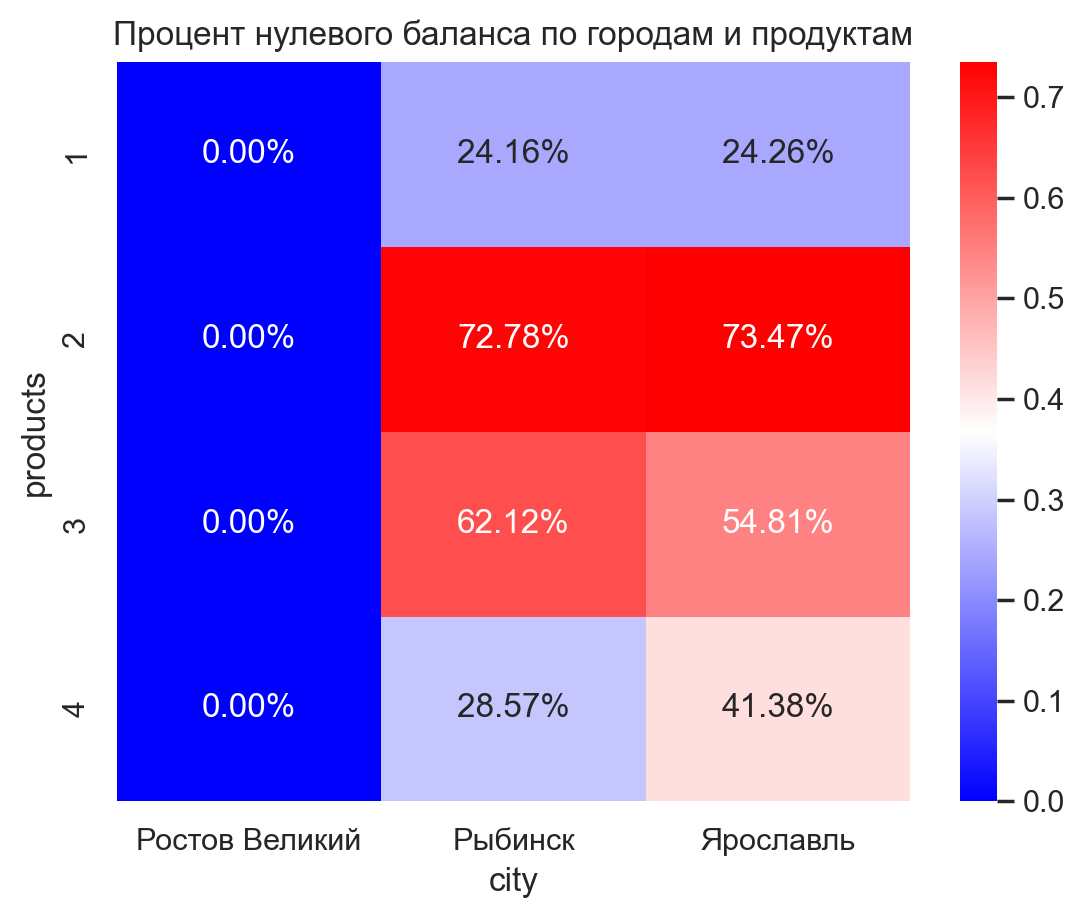

In [17]:
sns.heatmap(
    data.pivot_table(
        index='products', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по городам и продуктам");

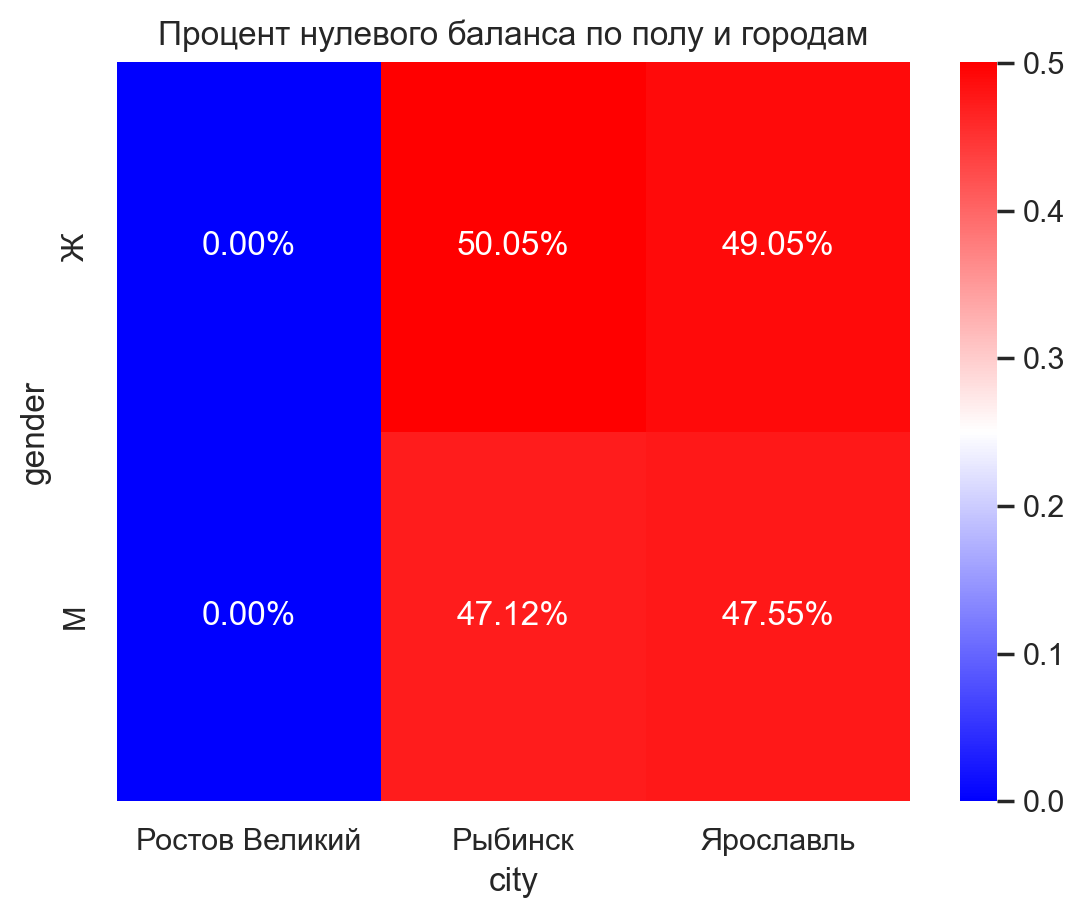

In [18]:
sns.heatmap(
    data.pivot_table(
        index='gender', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по полу и городам");

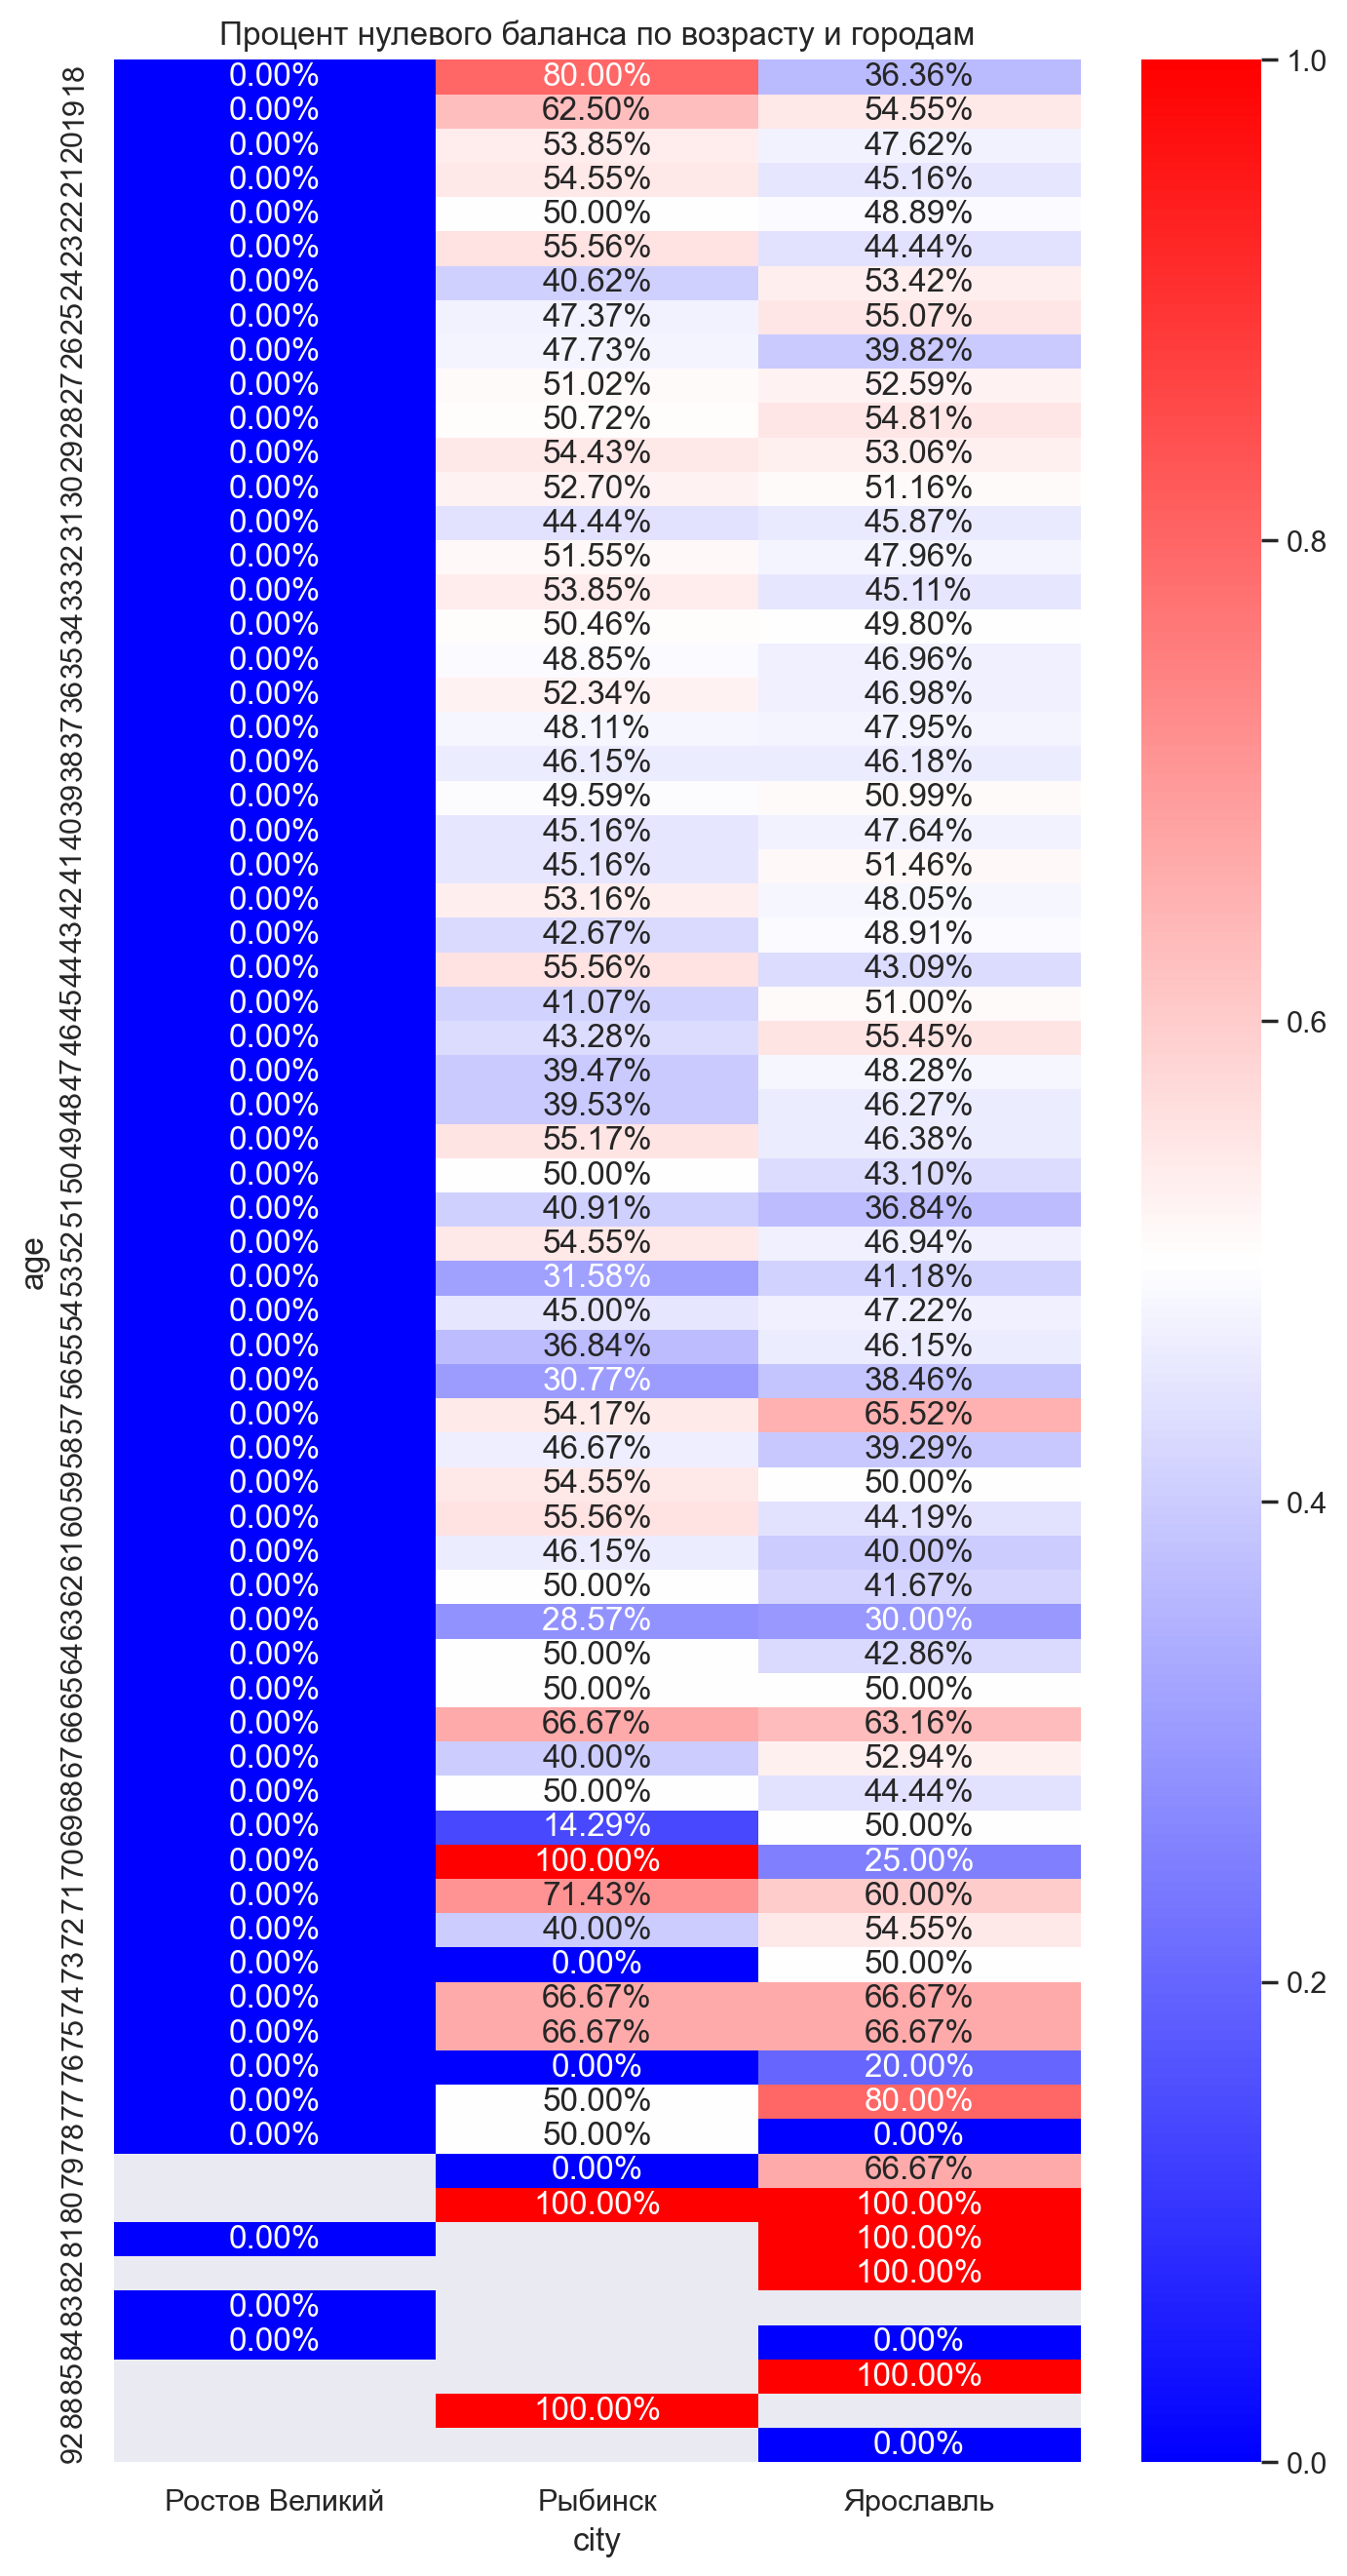

In [19]:
sns.set(rc={"figure.figsize":(8, 16)})
sns.heatmap(
    data.pivot_table(
        index='age', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по возрасту и городам");

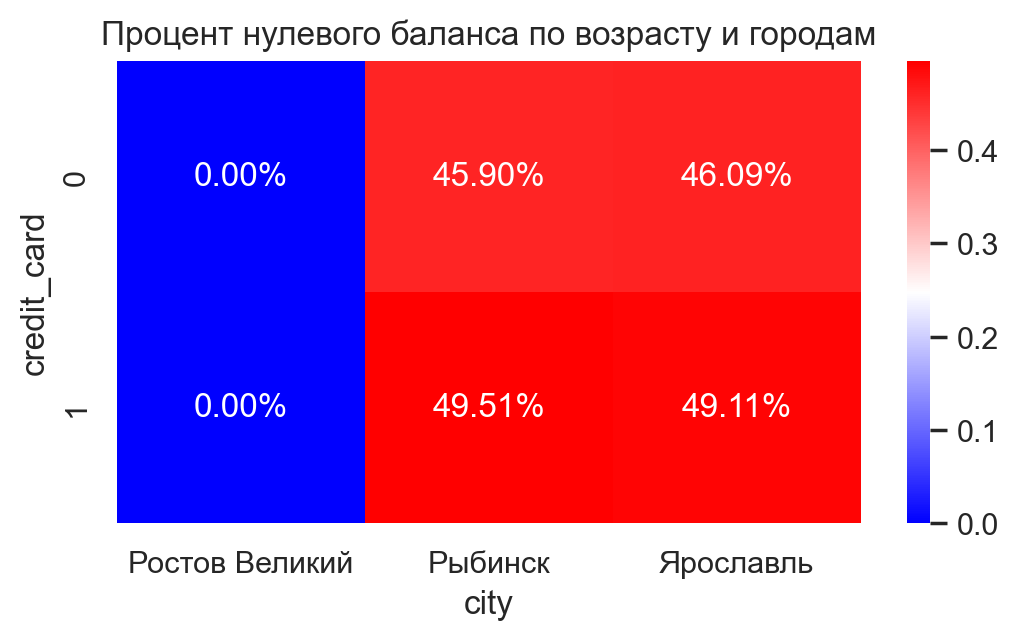

In [20]:
sns.set(rc={"figure.figsize":(6, 3)})
sns.heatmap(
    data.pivot_table(
        index='credit_card', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по возрасту и городам");

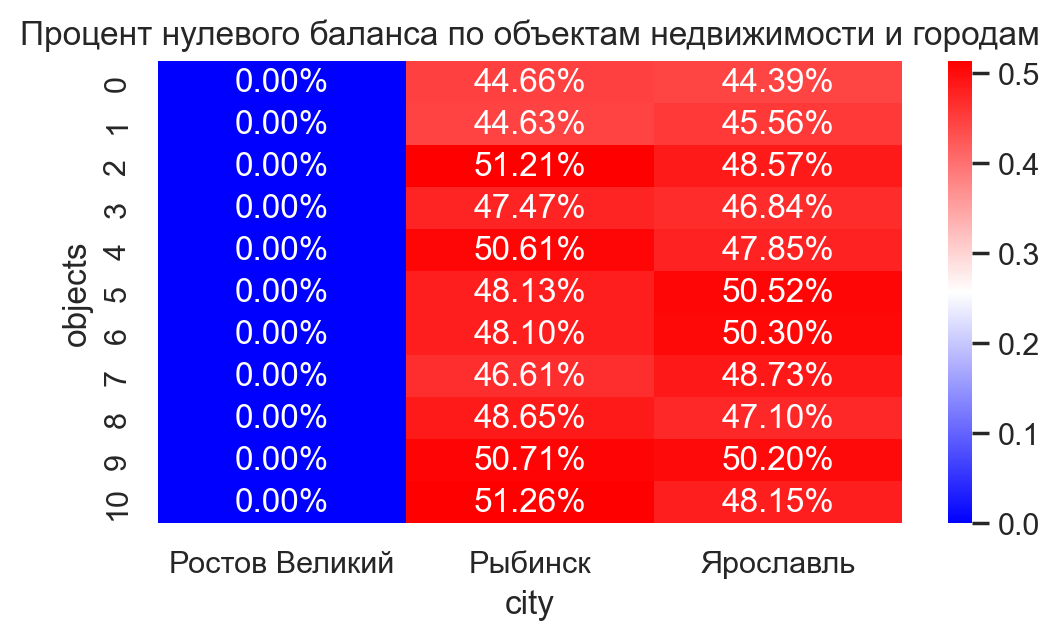

In [21]:
sns.set(rc={"figure.figsize":(6, 3)})
sns.heatmap(
    data.pivot_table(
        index='objects', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по объектам недвижимости и городам");

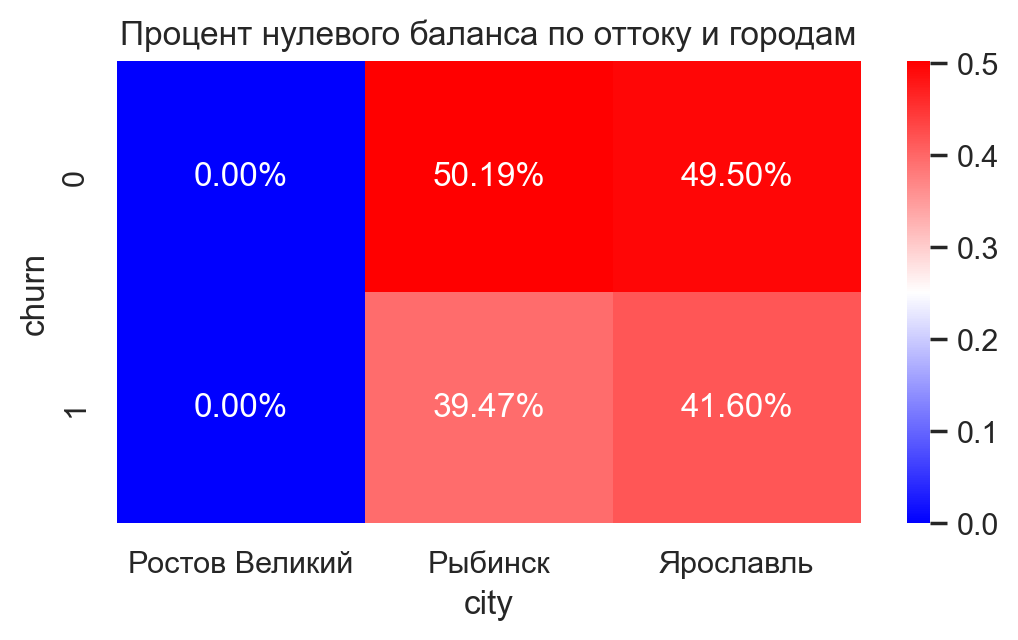

In [22]:
sns.heatmap(
    data.pivot_table(
        index='churn', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по оттоку и городам");

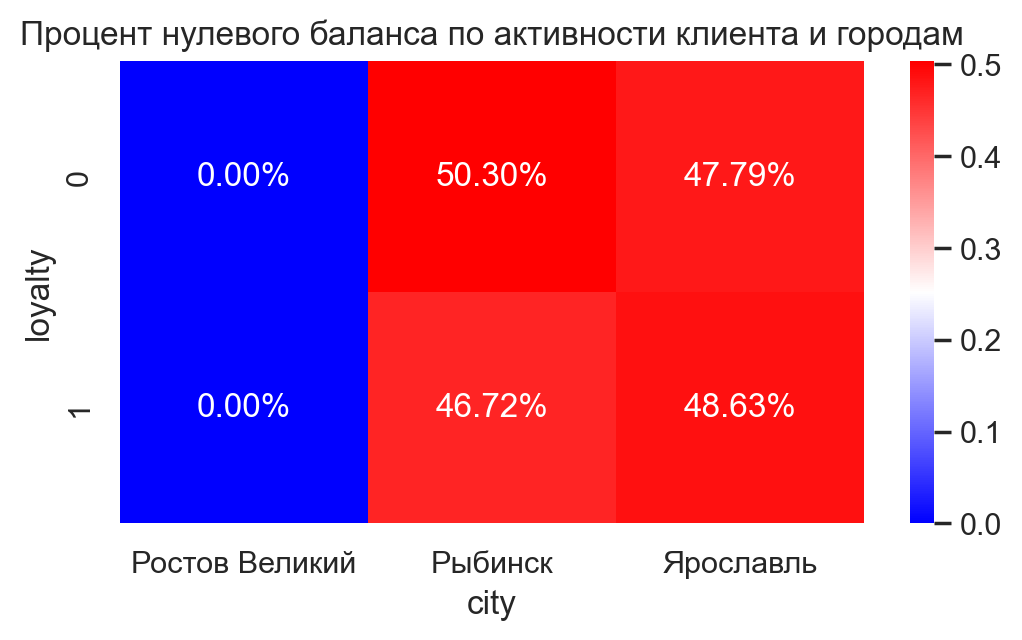

In [23]:
sns.heatmap(
    data.pivot_table(
        index='loyalty', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по активности клиента и городам");

<b>Вывод:</b> Изменили названия колонок - привели в нижний регистр, данные представленны в правильном формате, явные дубликаты отсутствуют, пропуски есть только в колонке - balance. Всего пропусков 3617, что приблизительно 36% от всего количества. Пропуски отсутствуют в данных города Ростов Великий. Возможно причина пропусков в данных связана с неточным заполнением данных или в проблем автоматизации в городе Рыбинск и Ярославль. Так же обнаружили что больше пропусков по клиентам с 2 и 3 продуктами.

## Исследовательский анализ данных.

In [24]:
data.describe().T

count          mean           std          min  \
user_id           10000.0  1.573368e+07  71936.186123  15608437.00   
score             10000.0  6.505288e+02     96.653299       350.00   
age               10000.0  3.892180e+01     10.487806        18.00   
objects           10000.0  5.012800e+00      2.892174         0.00   
balance            6383.0  1.198275e+05  30095.056462      3768.69   
products          10000.0  1.530200e+00      0.581654         1.00   
credit_card       10000.0  7.055000e-01      0.455840         0.00   
loyalty           10000.0  5.151000e-01      0.499797         0.00   
estimated_salary  10000.0  1.000902e+05  57510.492818        11.58   
churn             10000.0  2.037000e-01      0.402769         0.00   

                           25%           50%           75%          max  
user_id           1.567126e+07  1.573347e+07  1.579597e+07  15858426.00  
score             5.840000e+02  6.520000e+02  7.180000e+02       850.00  
age               3.200000e+01  3.700000e+01  4.400000e+01        92.00  
objects           3.000000e+00  5.000000e+00  7.000000e+00        10.00  
balance           1.001820e+05  1.198397e+05  1.395123e+05    250898.09  
products          1.000000e+00  1.000000e+00  2.000000e+00         4.00  
credit_card       0.000000e+00  1.000000e+00  1.000000e+00         1.00  
loyalty           0.000000e+00  1.000000e+00  1.000000e+00         1.00  
estimated_salary  5.100211e+04  1.001939e+05  1.493882e+05    199992.48  
churn             0.000000e+00  0.000000e+00  0.000000e+00         1.00

### Графики.

In [25]:
def numeric_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(df[df['churn']==0][col], color = '#EFC87B', ax = plt.subplot(1, 2, 1))
    sns.histplot(df[df['churn']==1][col], label = 'отток', color = '#184562', ax = plt.subplot(1, 2, 1), alpha=.4)
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    sns.boxplot(y = col, x = 'churn', data = df, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [26]:
def categorical_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'churn', data = df, ax = plt.subplot(1, 2, 1),  palette='Pastel2')
    plt.ylabel('количество пользователей')
    plt.xlabel('')
    plt.legend() 
    
    gr = df.groupby([col, 'churn']).agg(count=('age', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [27]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'objects', 'balance', 'products', 'estimated_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Количество объектов недвижимости в собственности', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })

categorical = pd.DataFrame({'col' : ['gender', 'city', 'credit_card', 'loyalty'],
                            'title' : ['Пол', 'Город', 'Наличие кредитной карты', 'Активность']
                            })

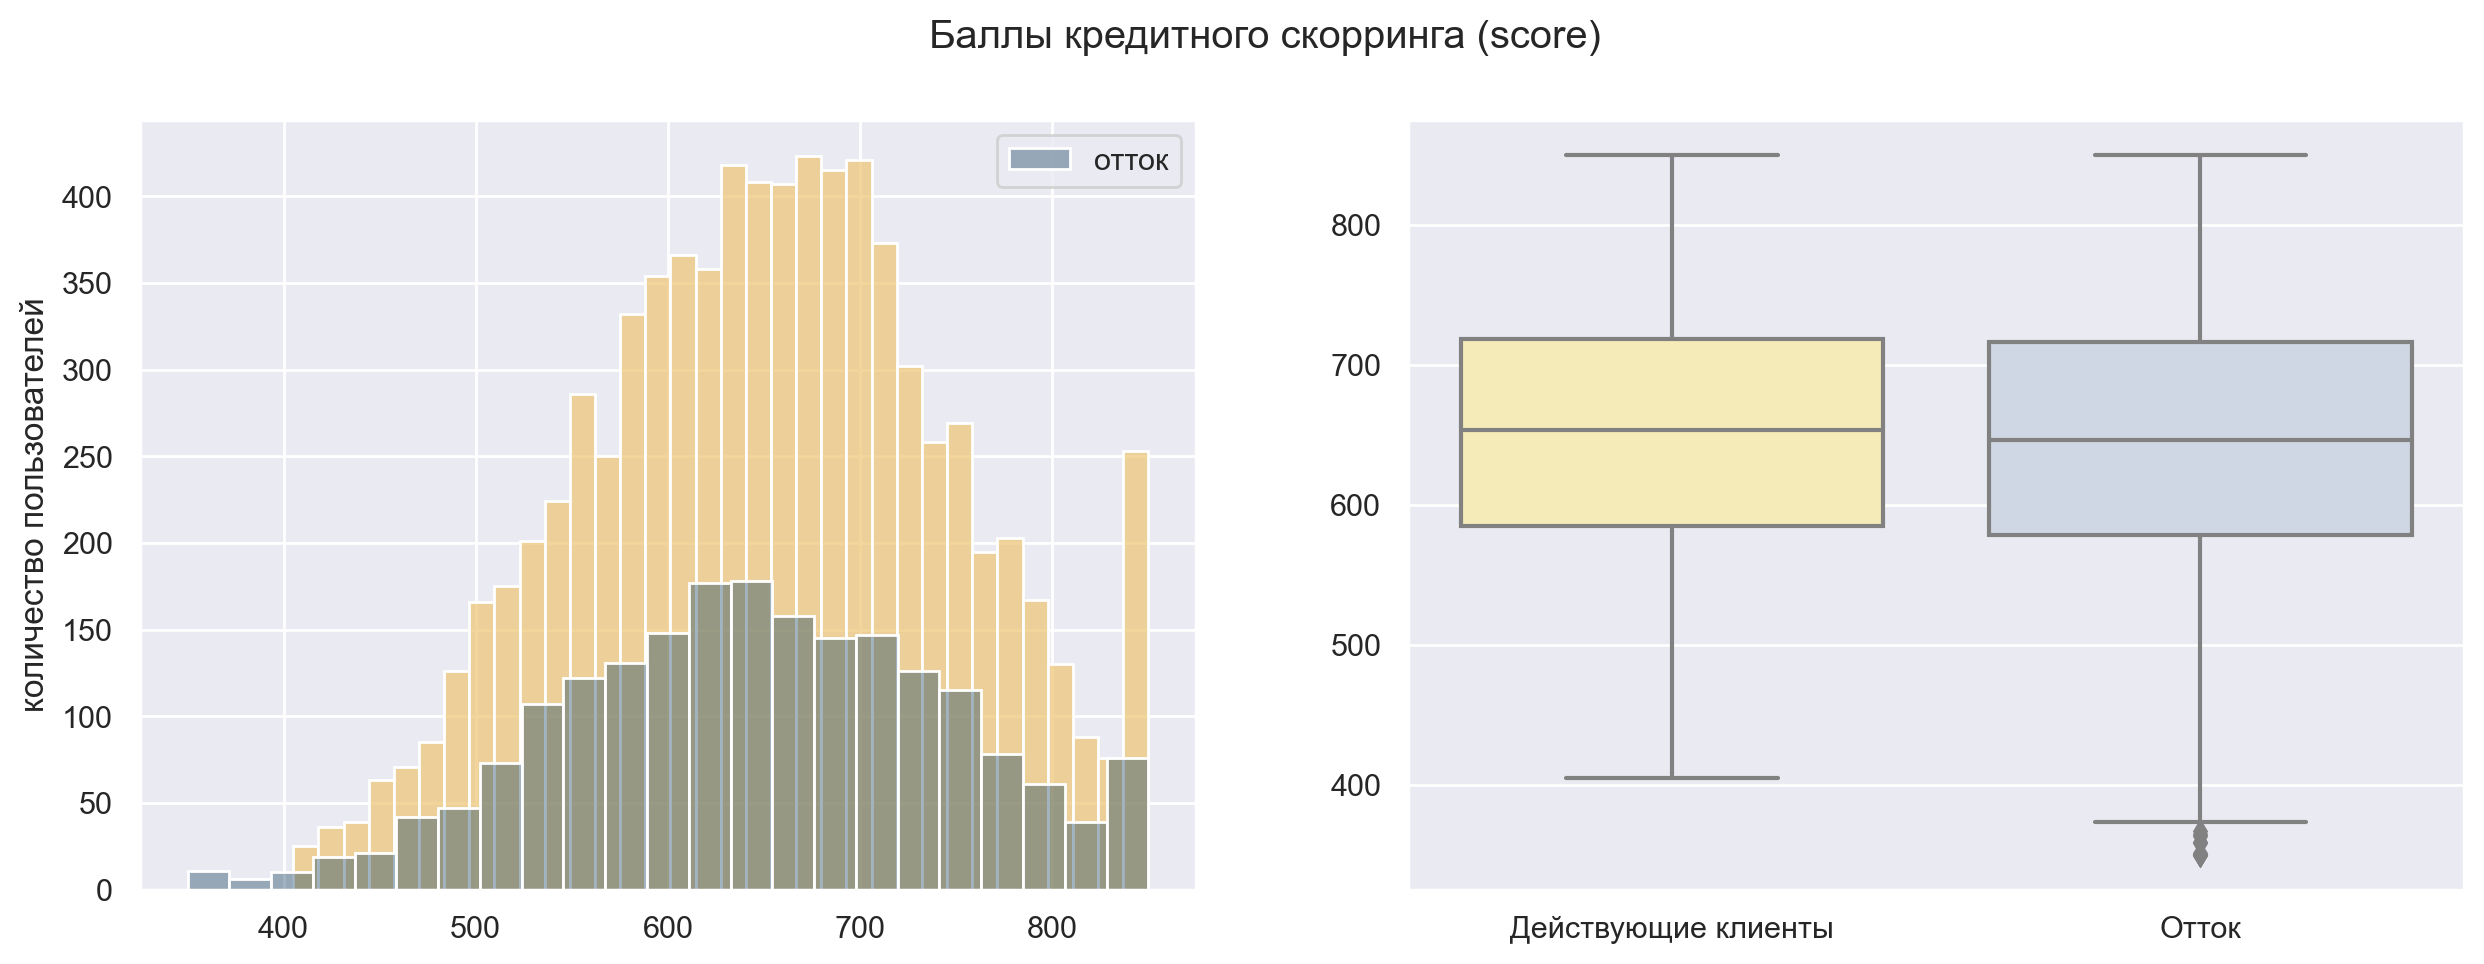

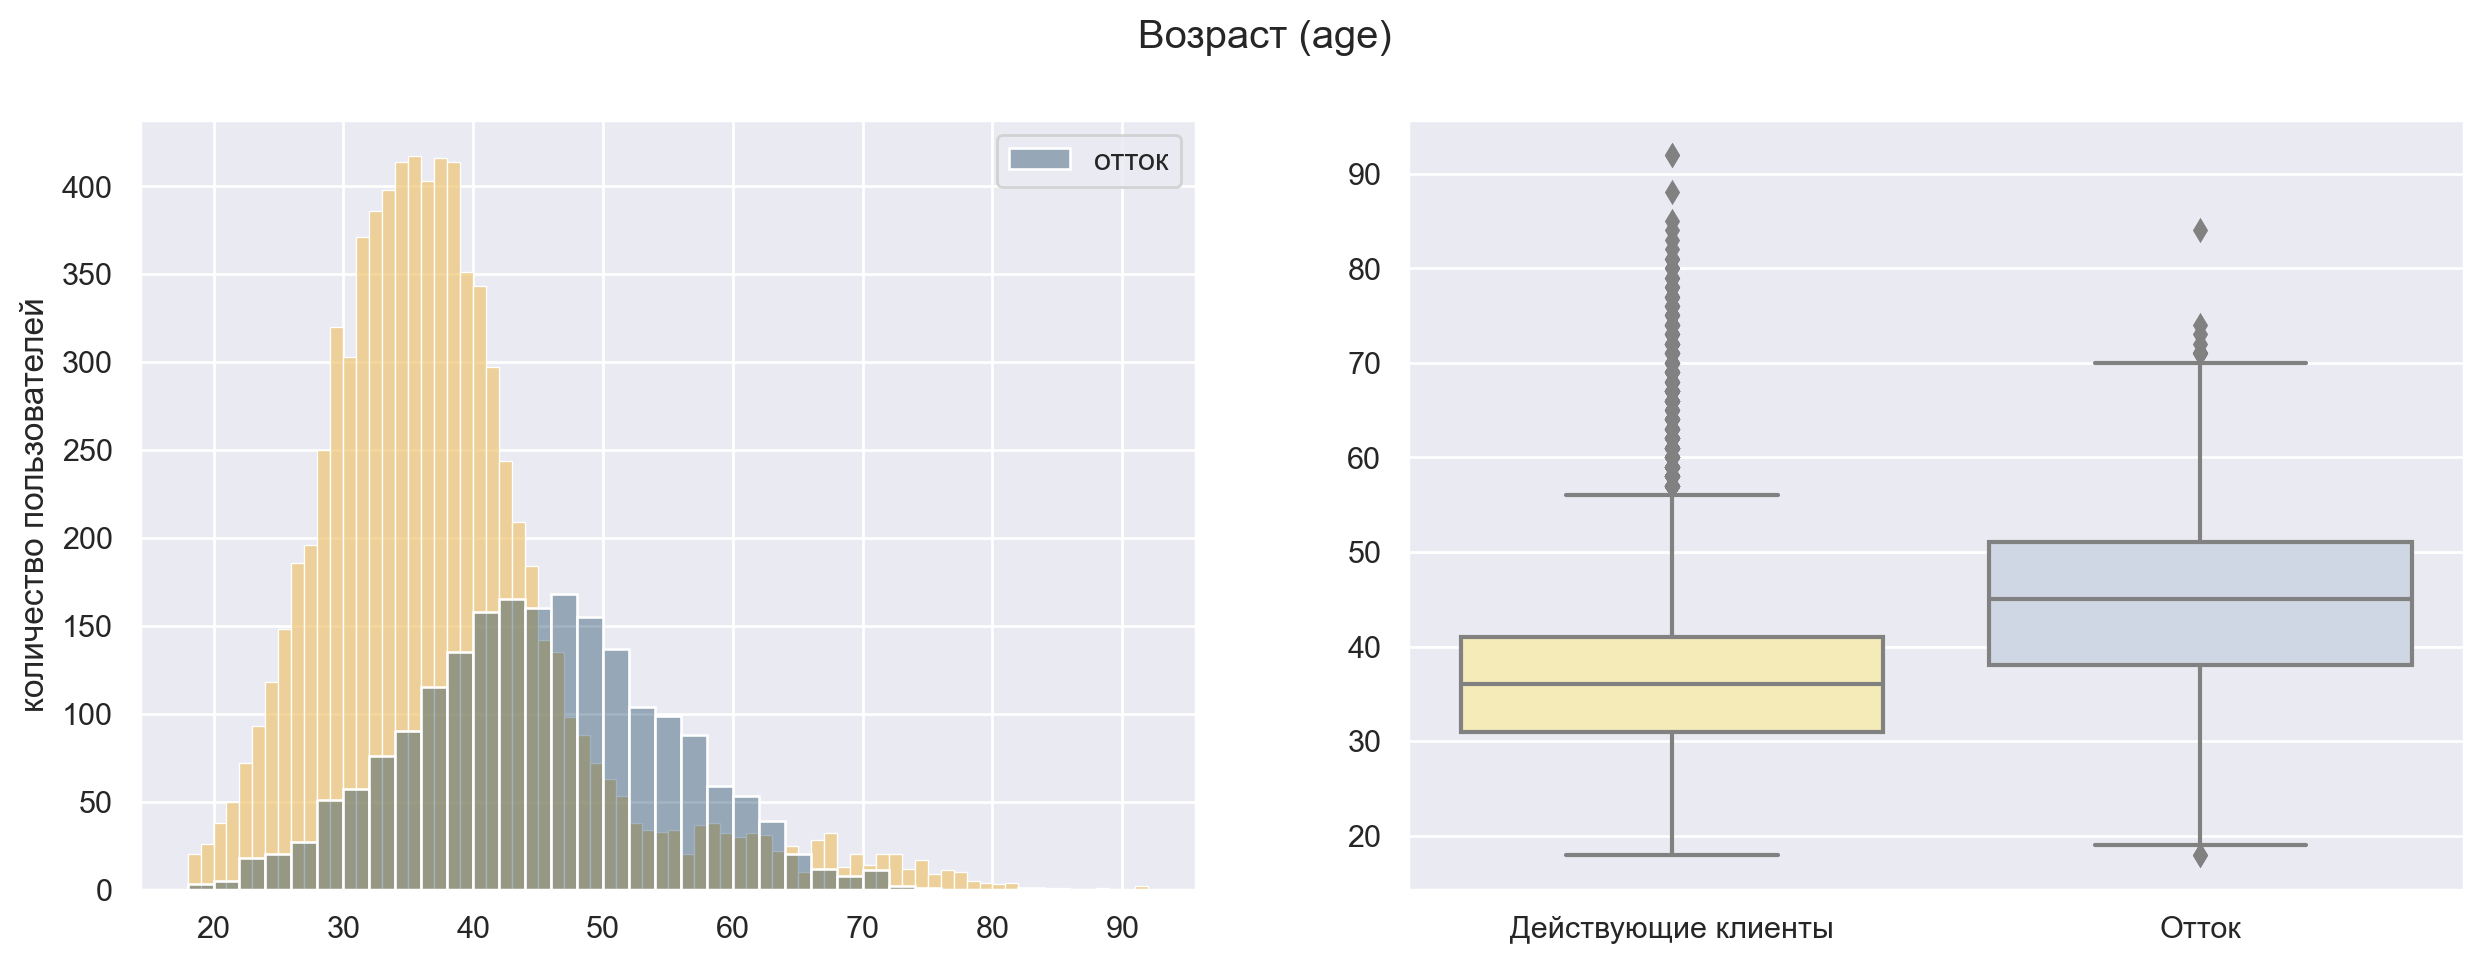

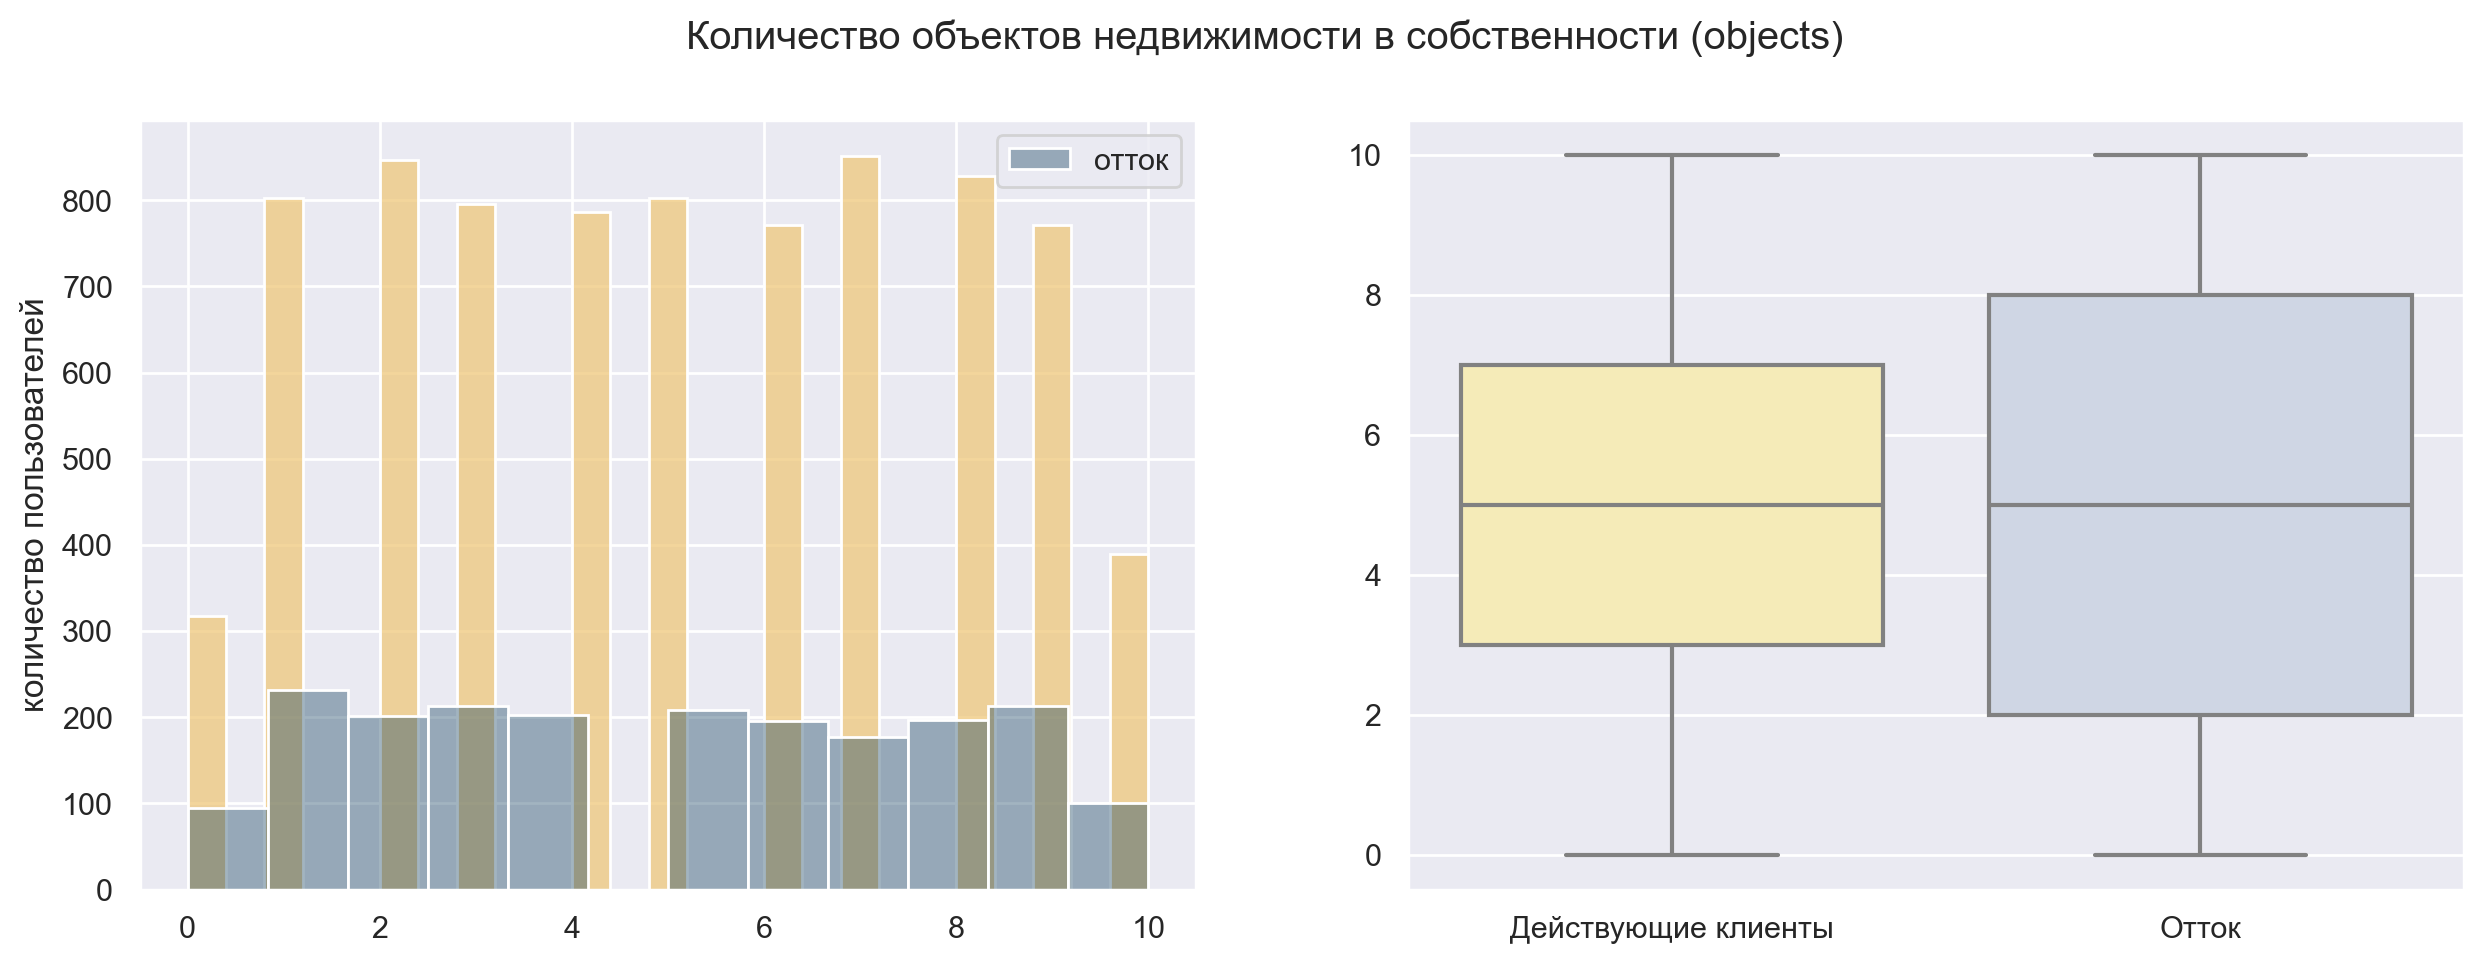

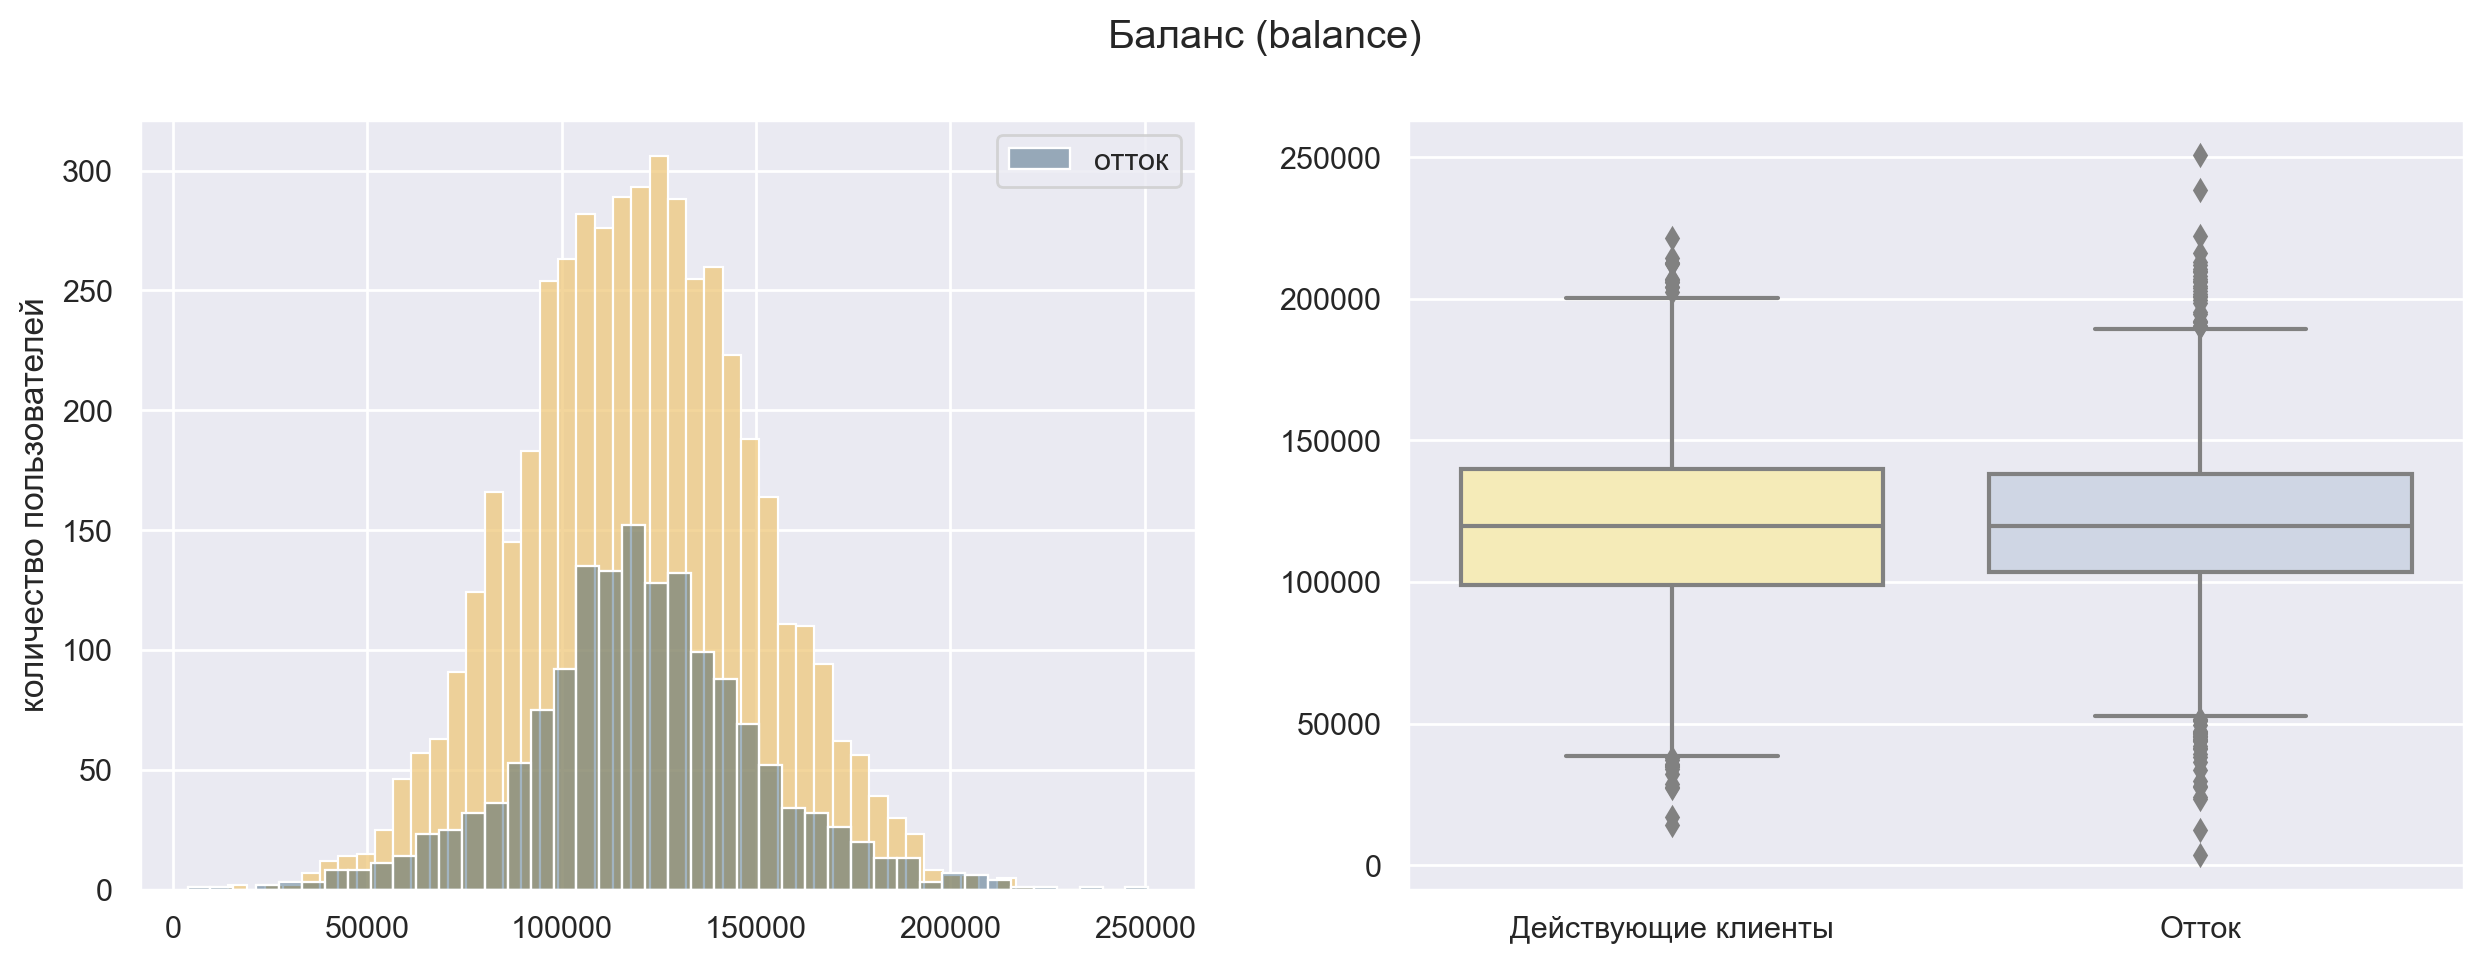

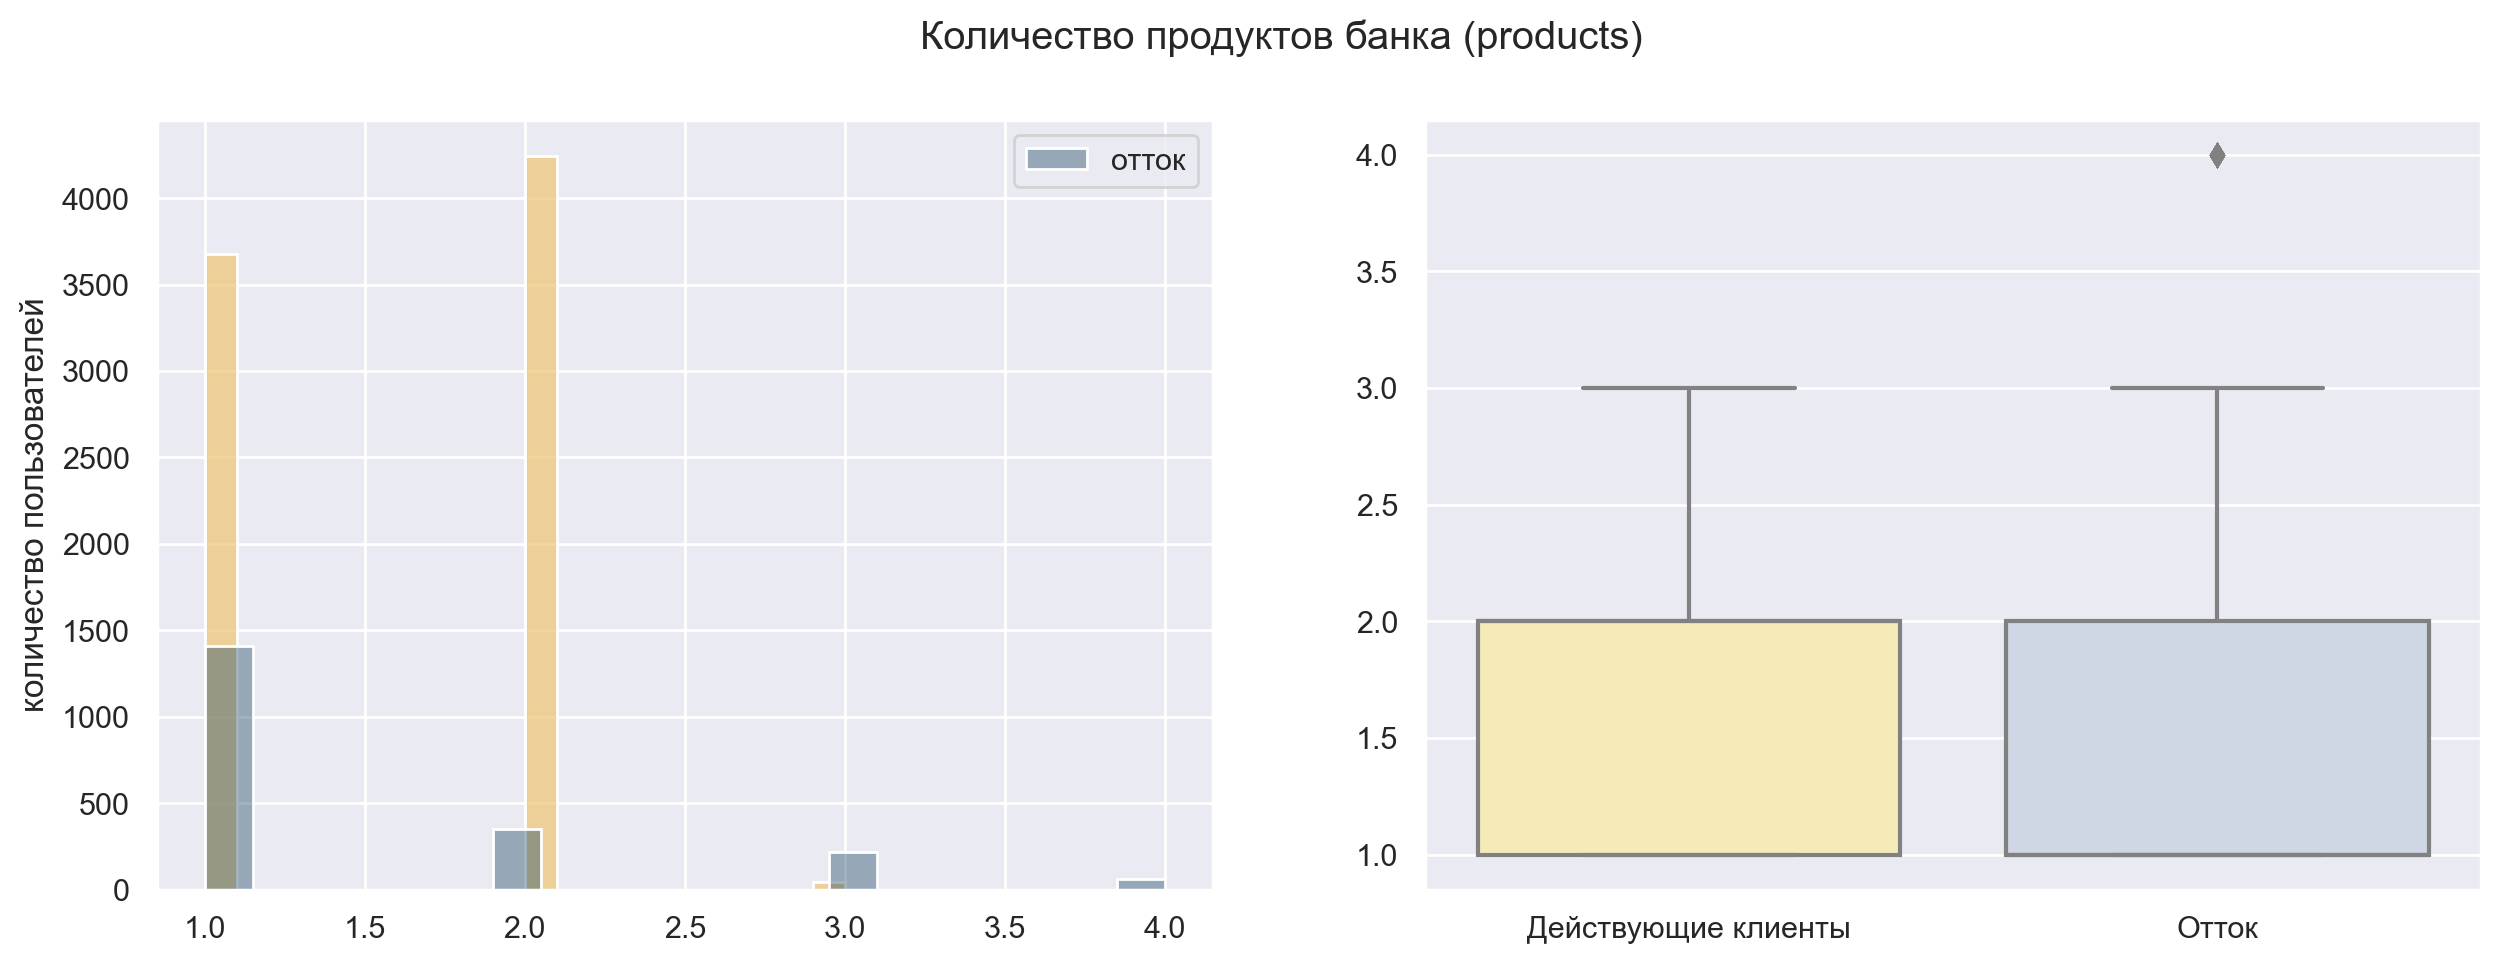

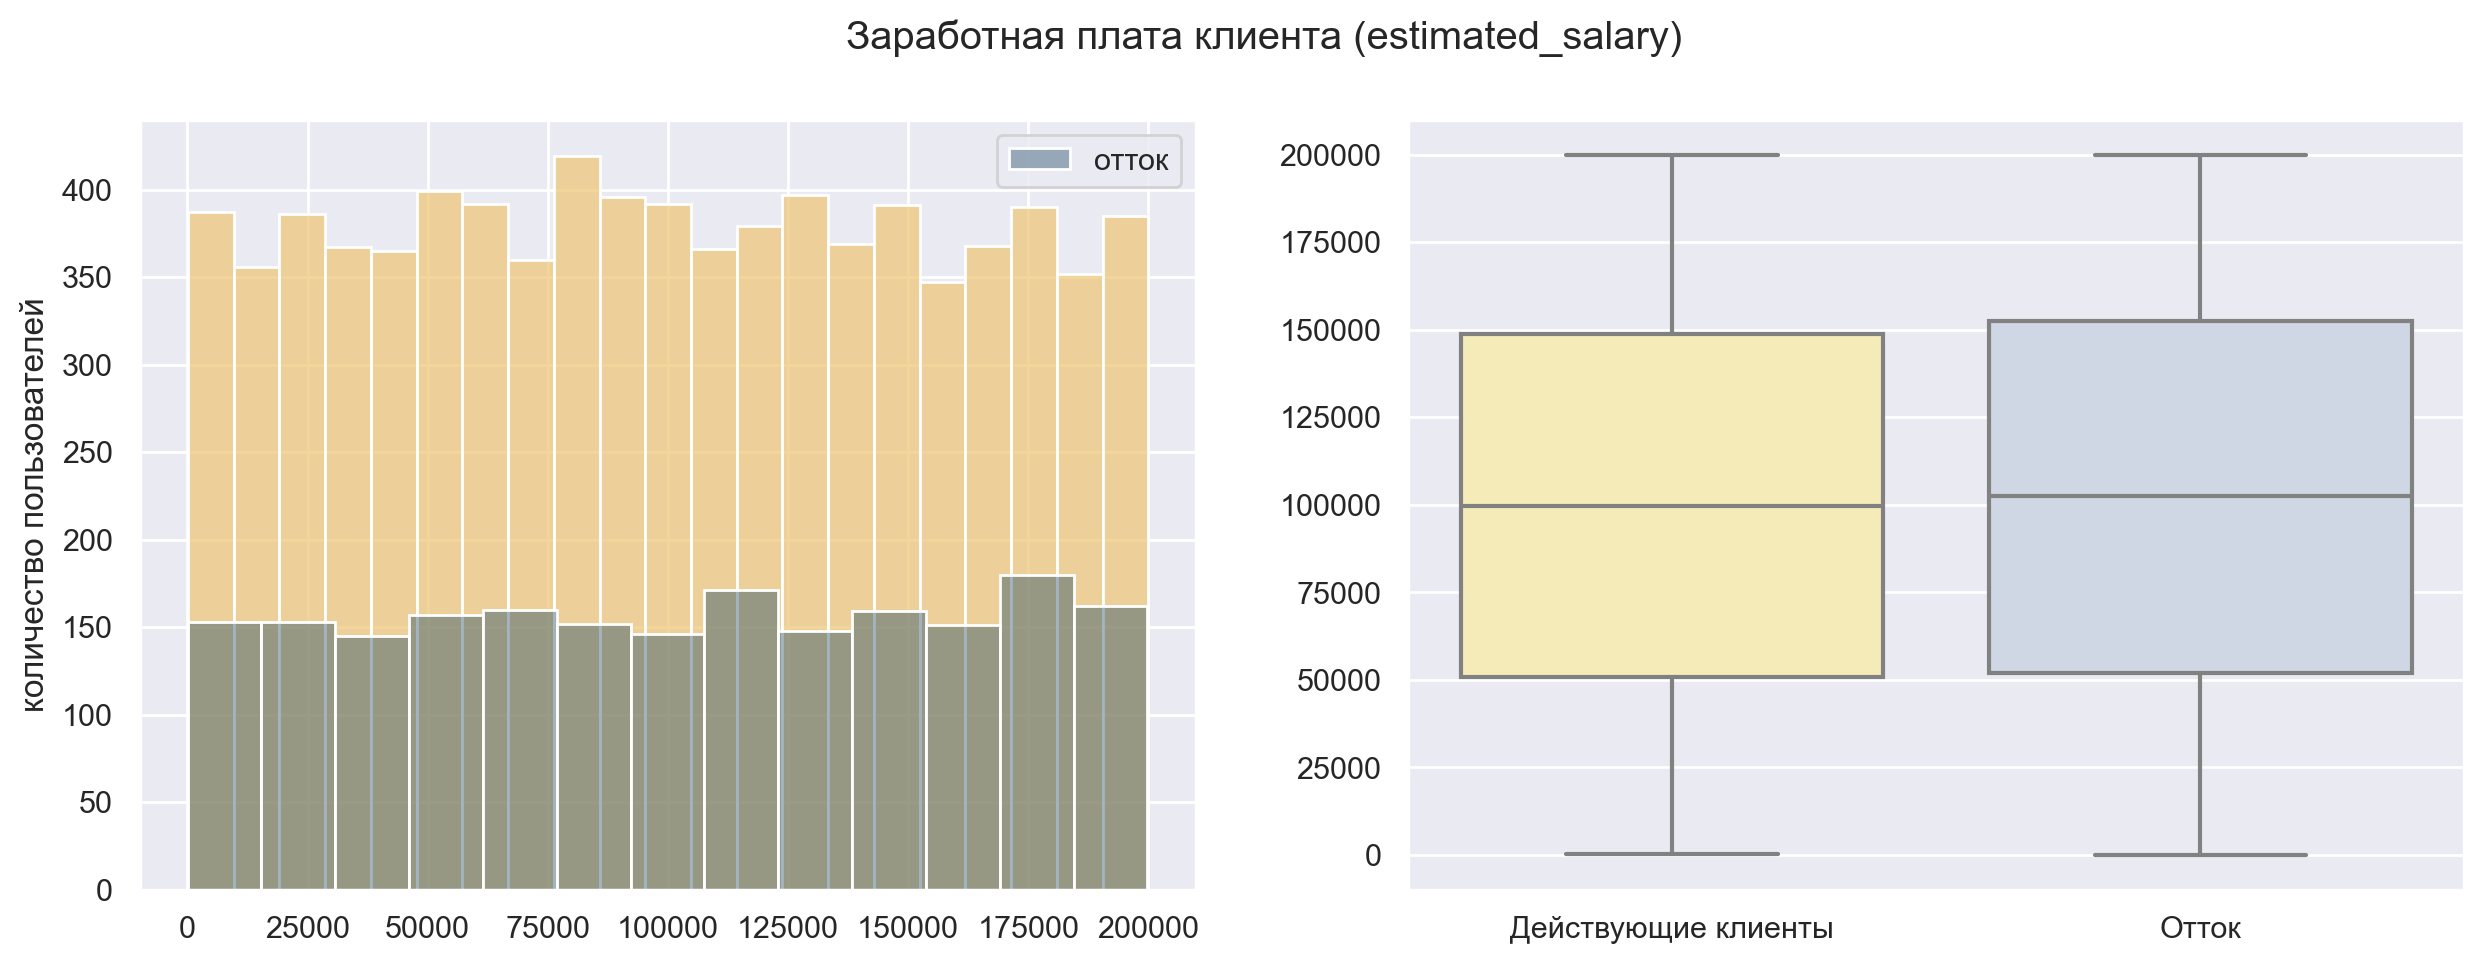

In [28]:
for index, row in numeric.iterrows():
    numeric_plots(data, row[0], row[1])

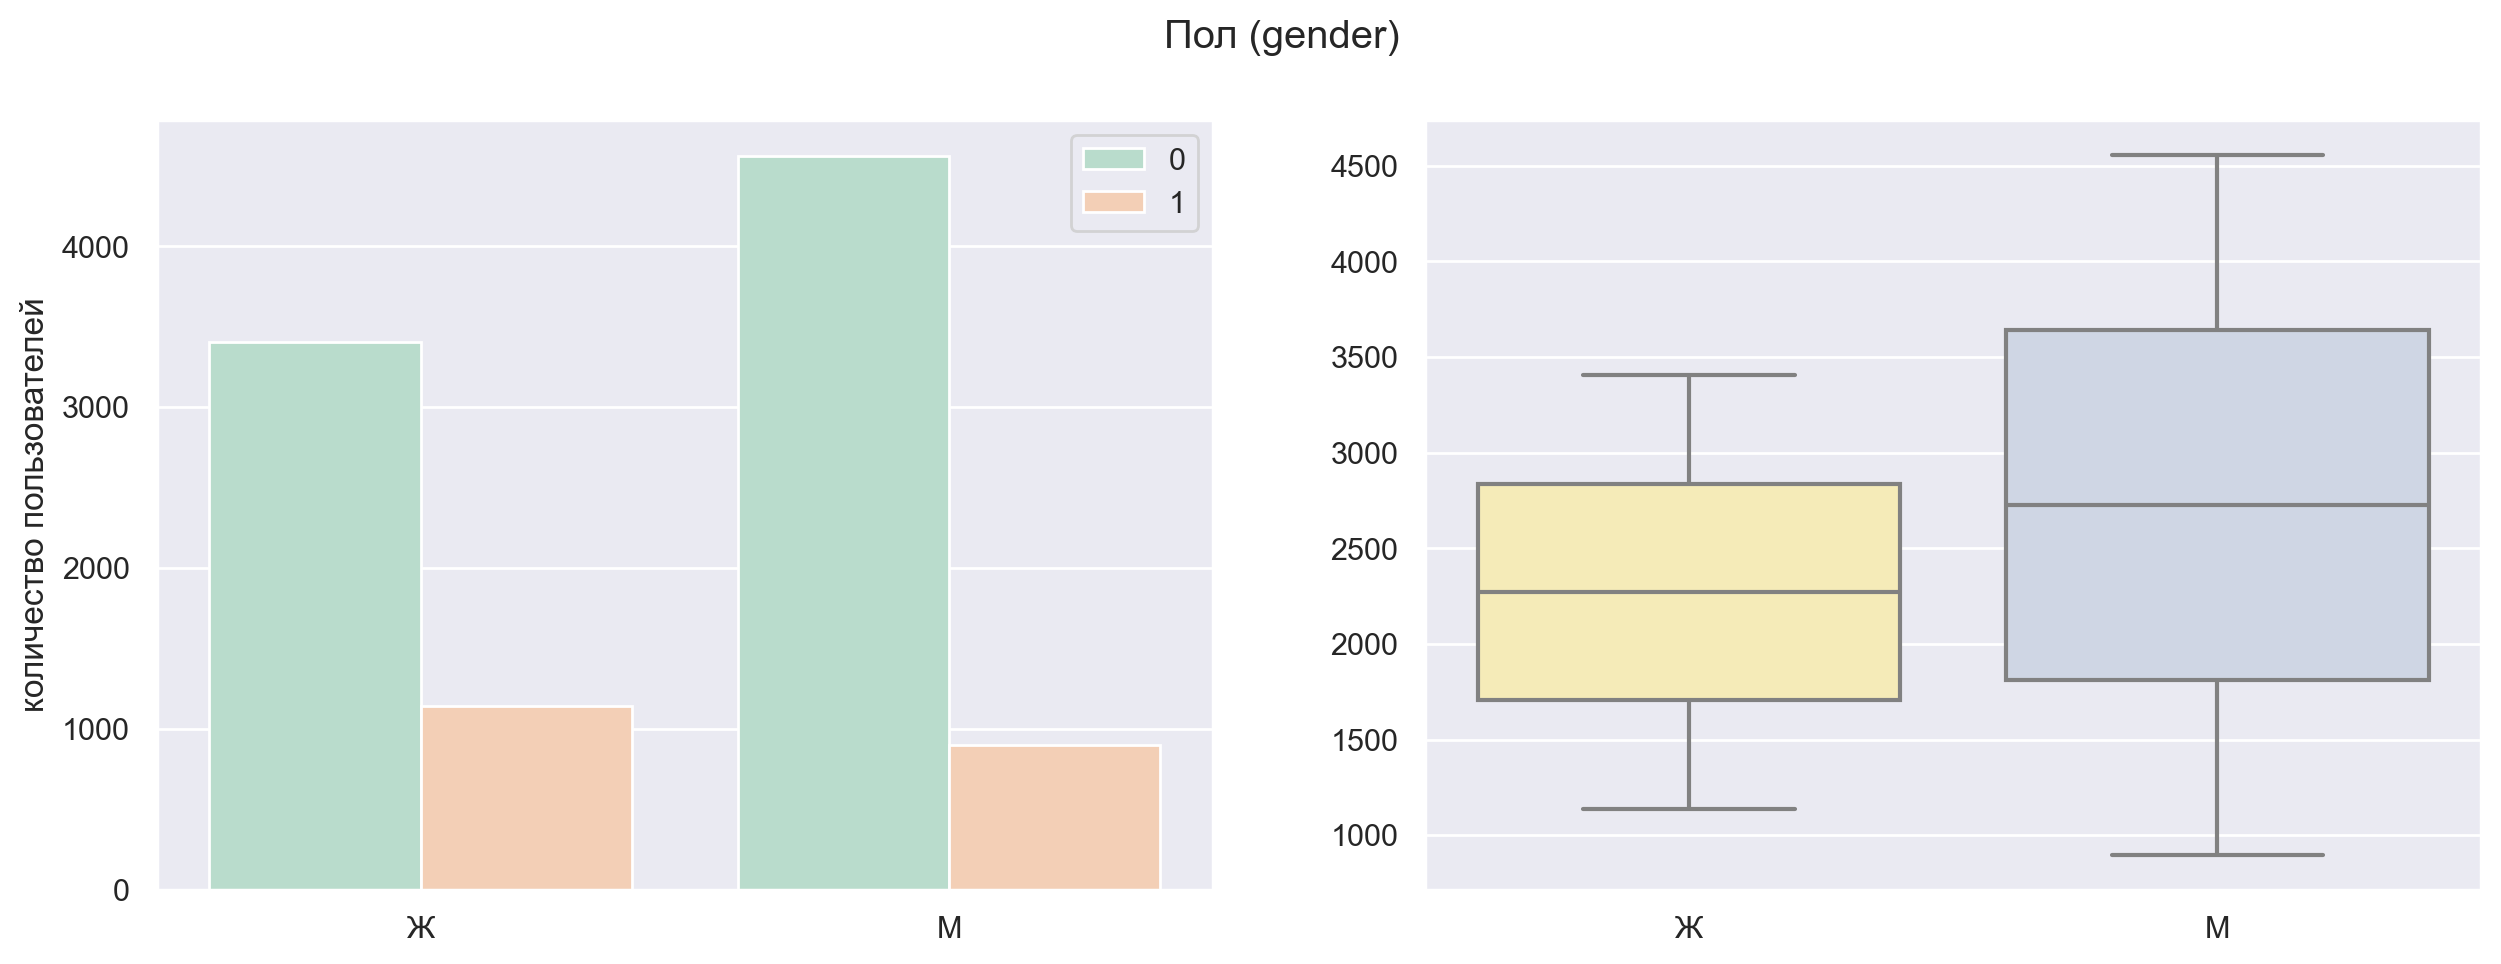

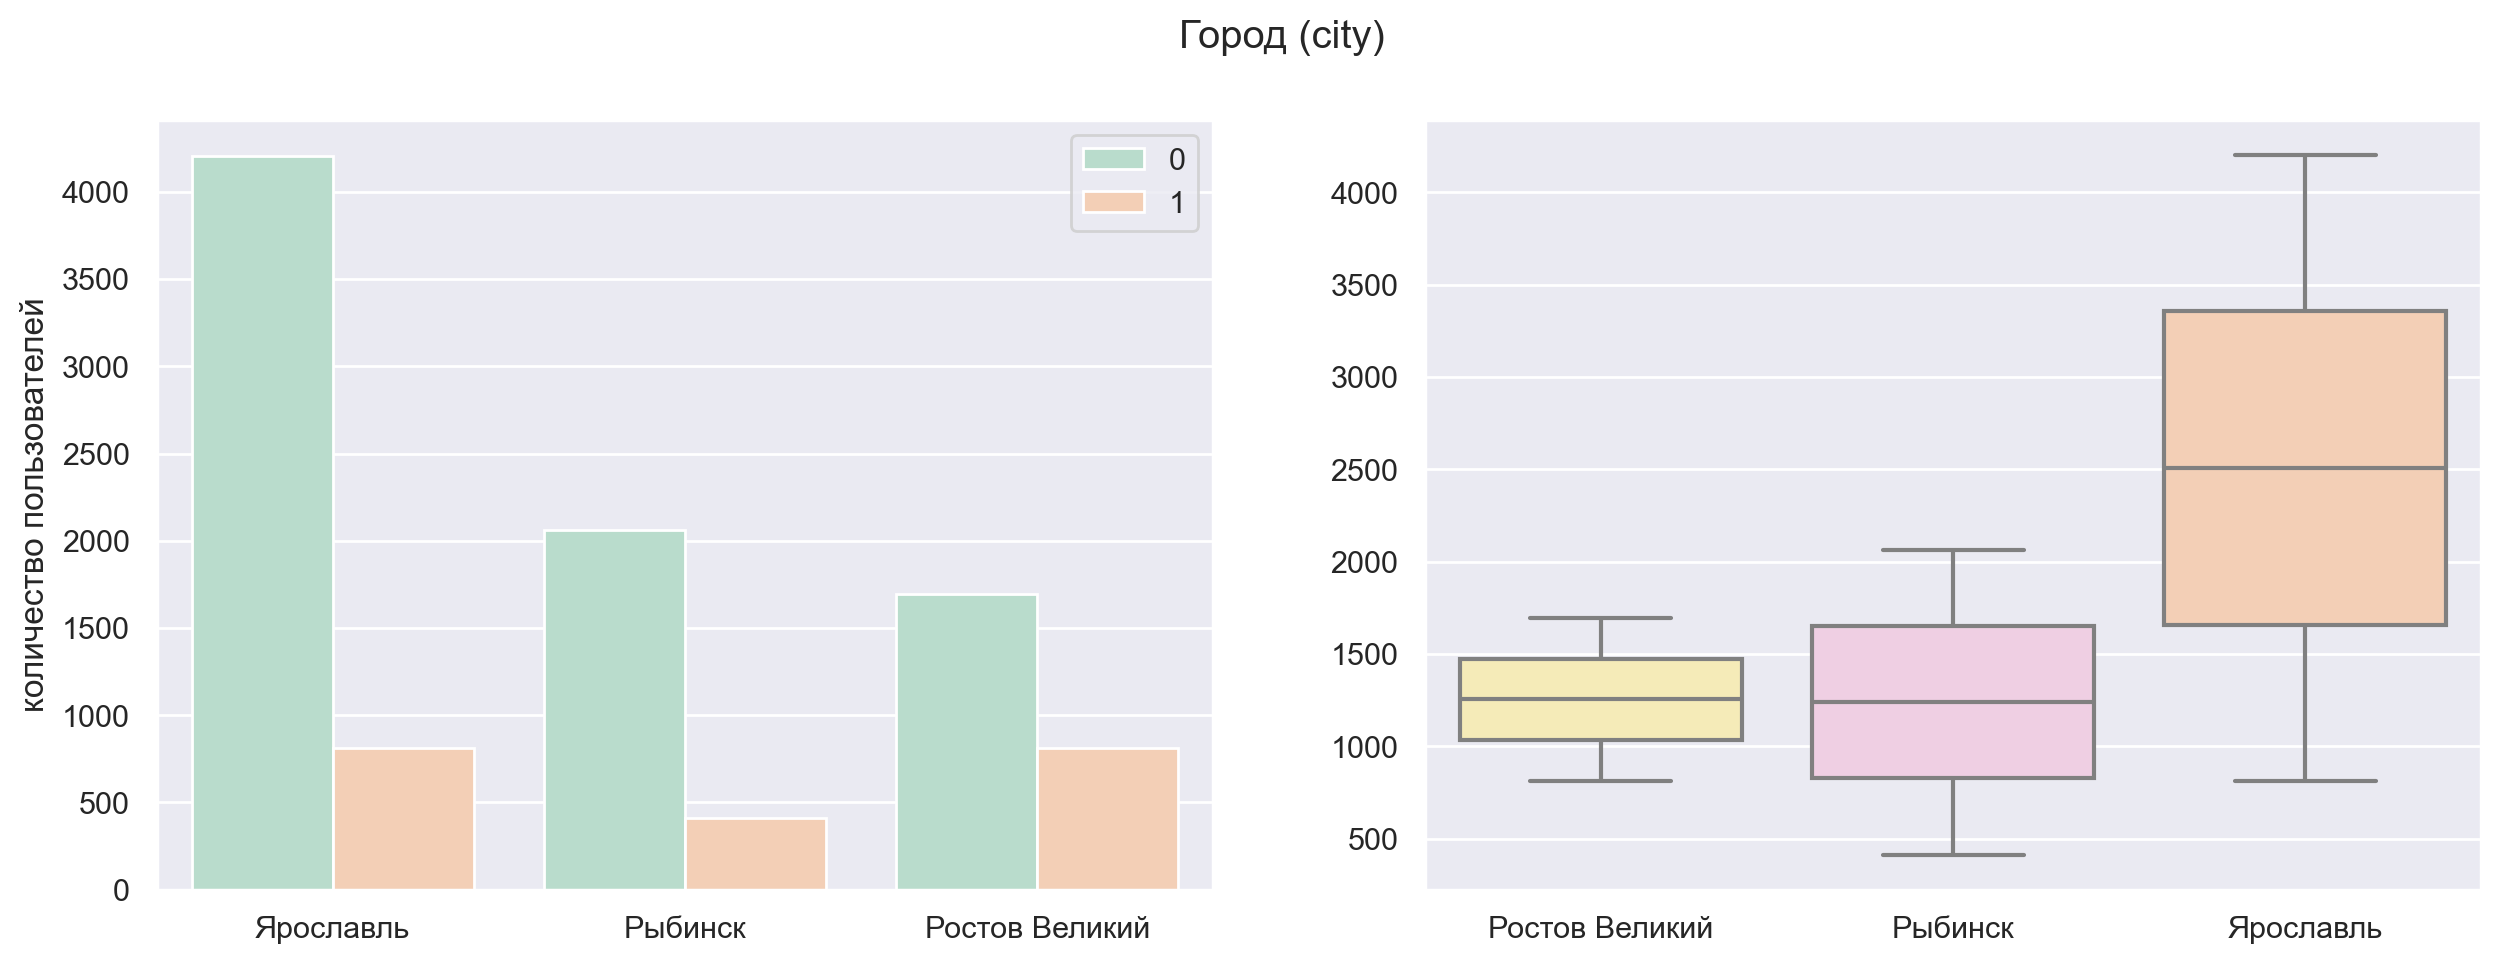

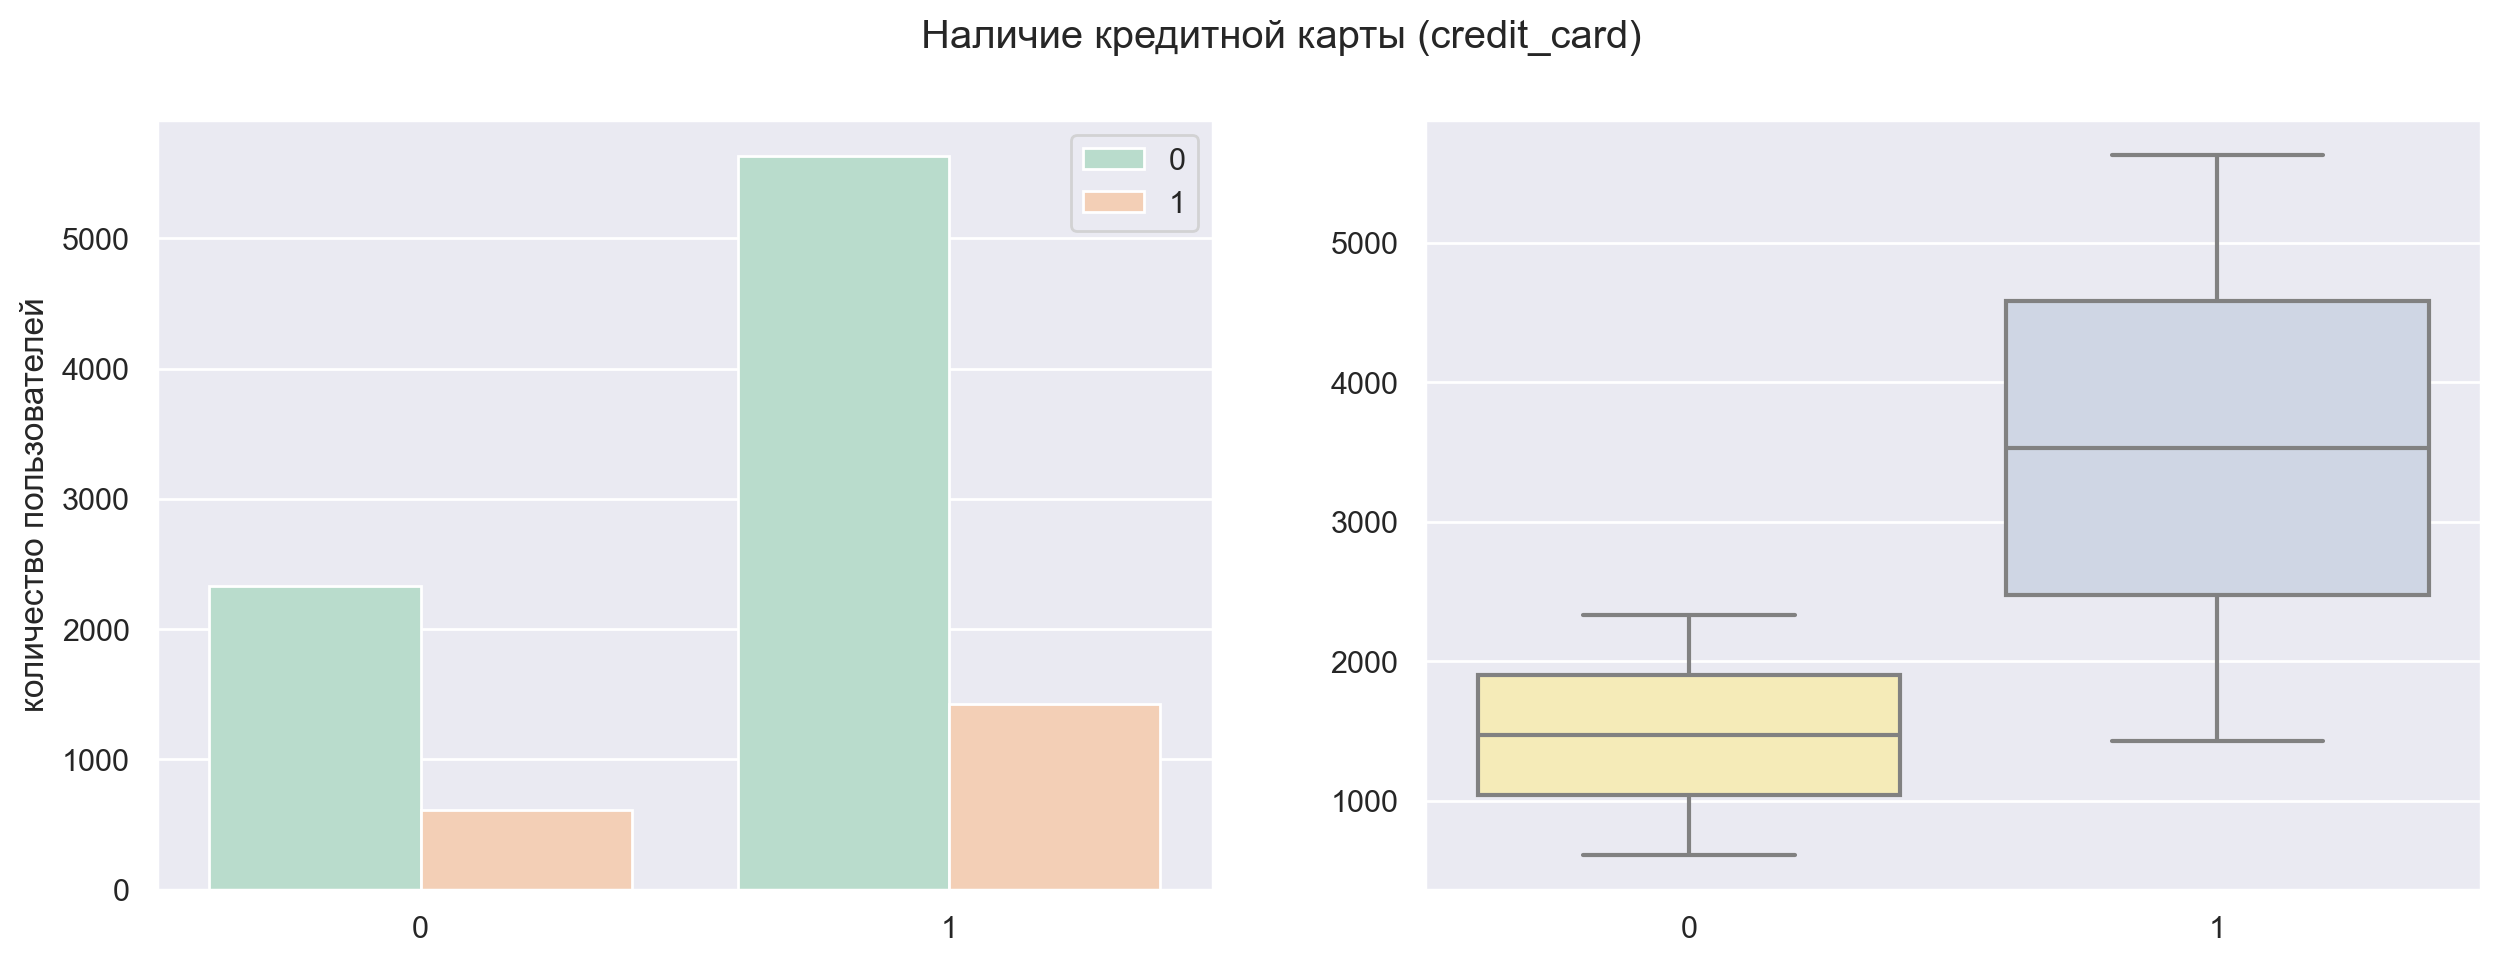

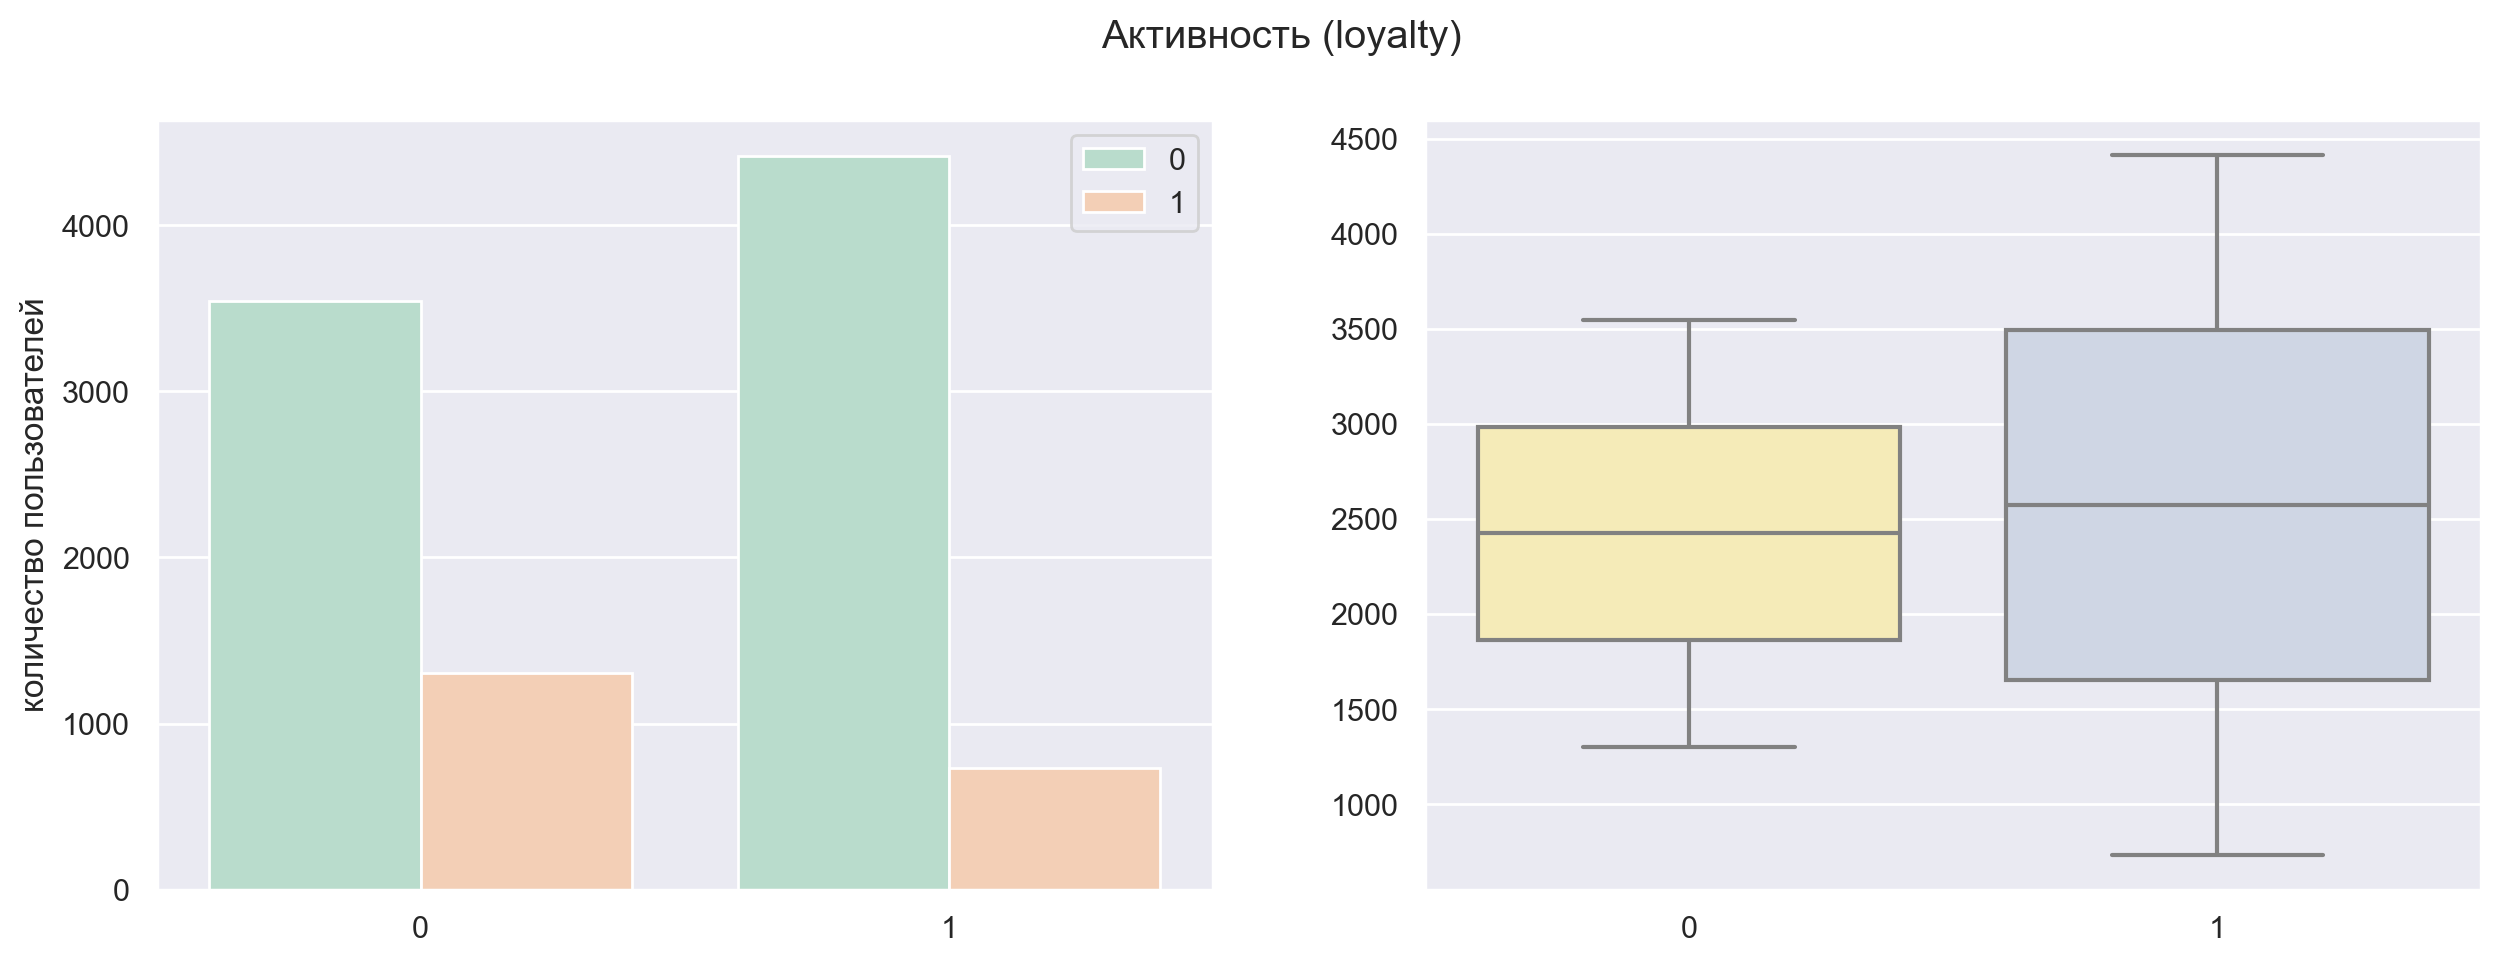

In [29]:
for index, row in categorical.iterrows():
    categorical_plots(data, row[0], row[1])

In [30]:
data_city = pd.get_dummies(data, columns=['city'], drop_first= False )

In [31]:
data_city.head()

user_id  score gender  age  objects    balance  products  credit_card  \
0  15677338    619      Ж   42        2        NaN         1            1   
1  15690047    608      Ж   41        1   83807.86         1            0   
2  15662040    502      Ж   42        8  159660.80         3            1   
3  15744090    699      Ж   39        1        NaN         2            0   
4  15780624    850      Ж   43        2  125510.82         1            1   

   loyalty  estimated_salary  churn  city_Ростов Великий  city_Рыбинск  \
0        1         101348.88      1                    0             0   
1        1         112542.58      0                    0             1   
2        0         113931.57      1                    0             0   
3        0          93826.63      0                    0             0   
4        1          79084.10      0                    0             1   

   city_Ярославль  
0               1  
1               0  
2               1  
3               1  
4               0

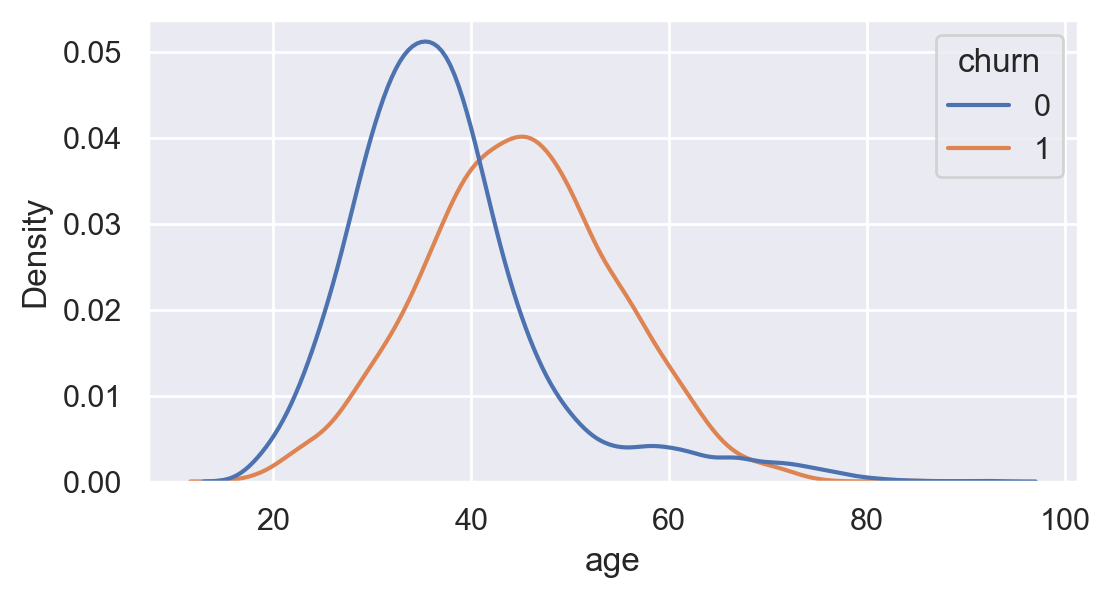

In [32]:
sns.kdeplot(data = data, x = 'age', hue = 'churn', common_norm=False);

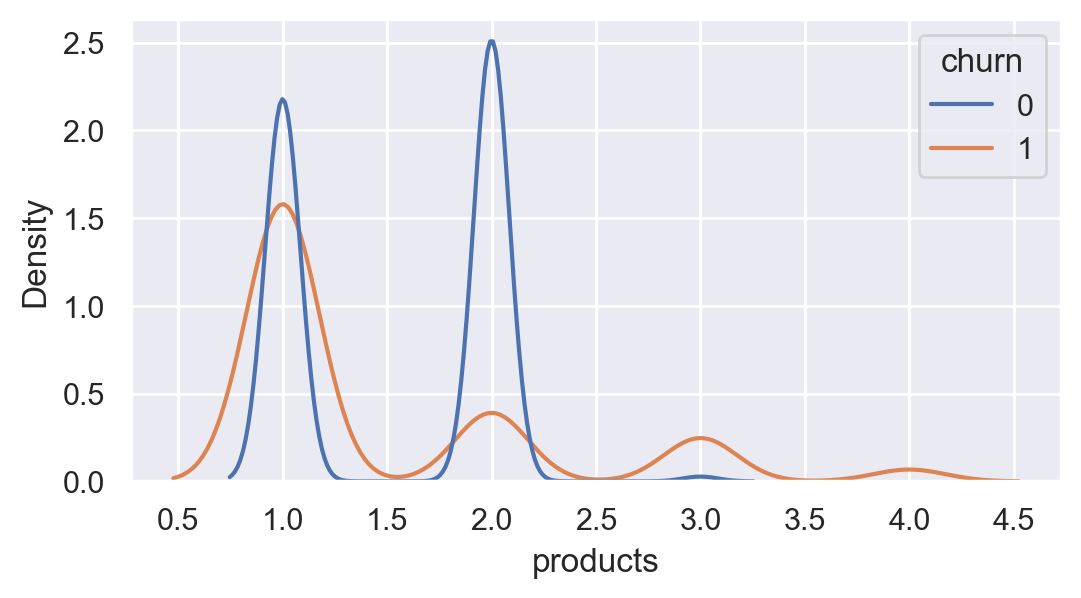

In [33]:
sns.kdeplot(data = data, x = 'products', hue = 'churn', common_norm=False);

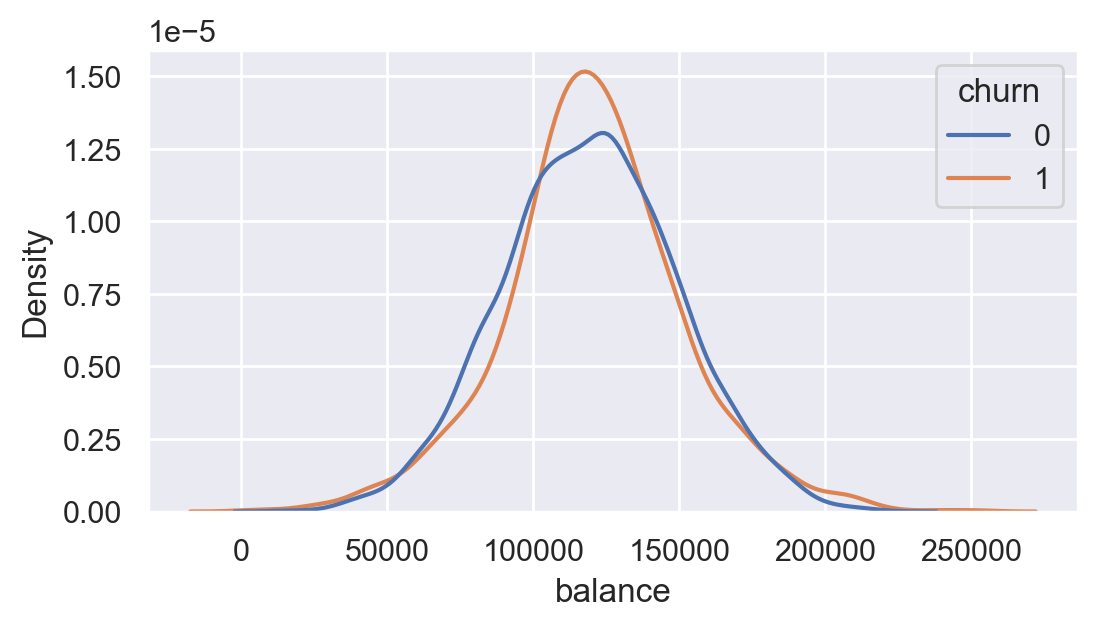

In [34]:
sns.kdeplot(data = data, x = 'balance', hue = 'churn', common_norm=False);

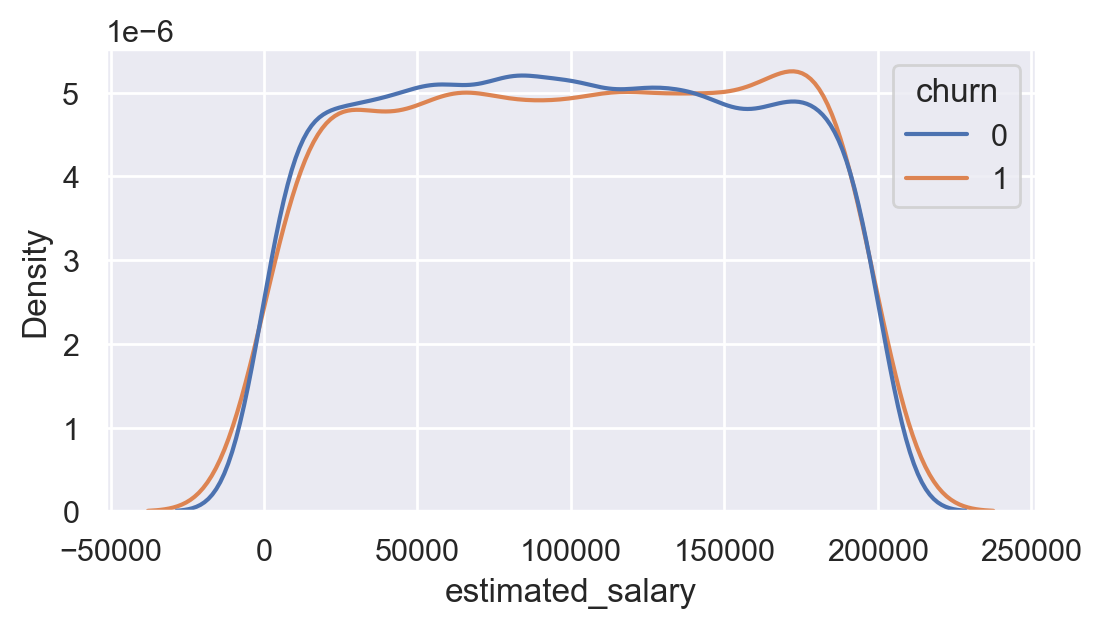

In [35]:
sns.kdeplot(data = data, x = 'estimated_salary', hue = 'churn', common_norm=False);

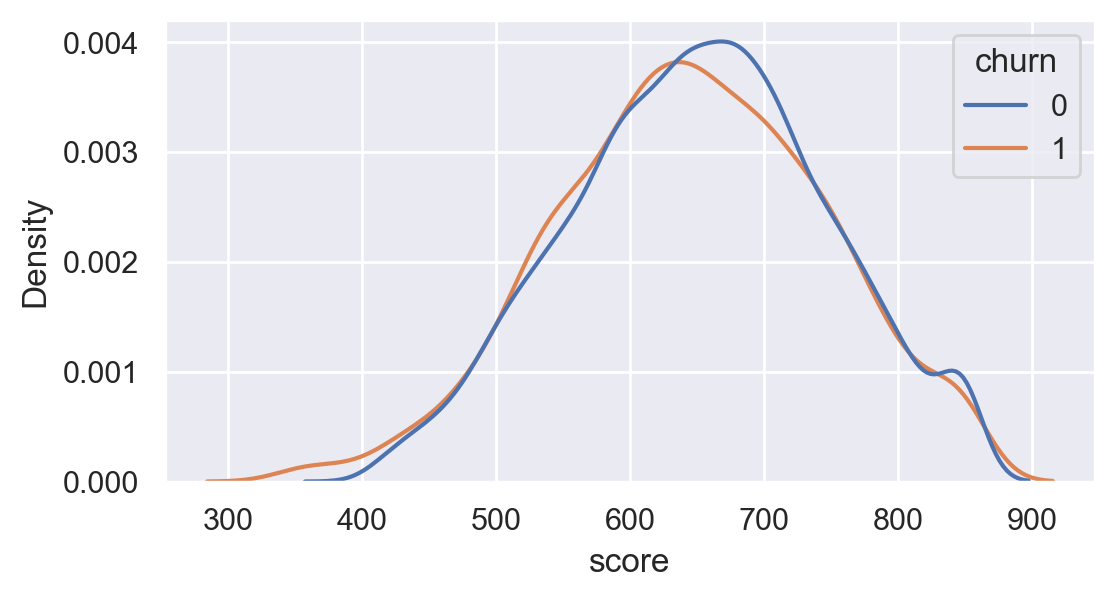

In [36]:
sns.kdeplot(data = data, x = 'score', hue = 'churn', common_norm=False);

<b>Вывод:</b> Можем сказать что на отток влияет пол - женщины уходят чаще; возраст - чаще всего уходят клиенты в возрасте 40-50лет; город - половина клиентов Ростова Великого уходит; количество банковских продуктов - клиенты у которых более 2х продуктов, уходят значительно чаще. По заработной плате и балансу различия не существенны.

### Матрица корреляции.

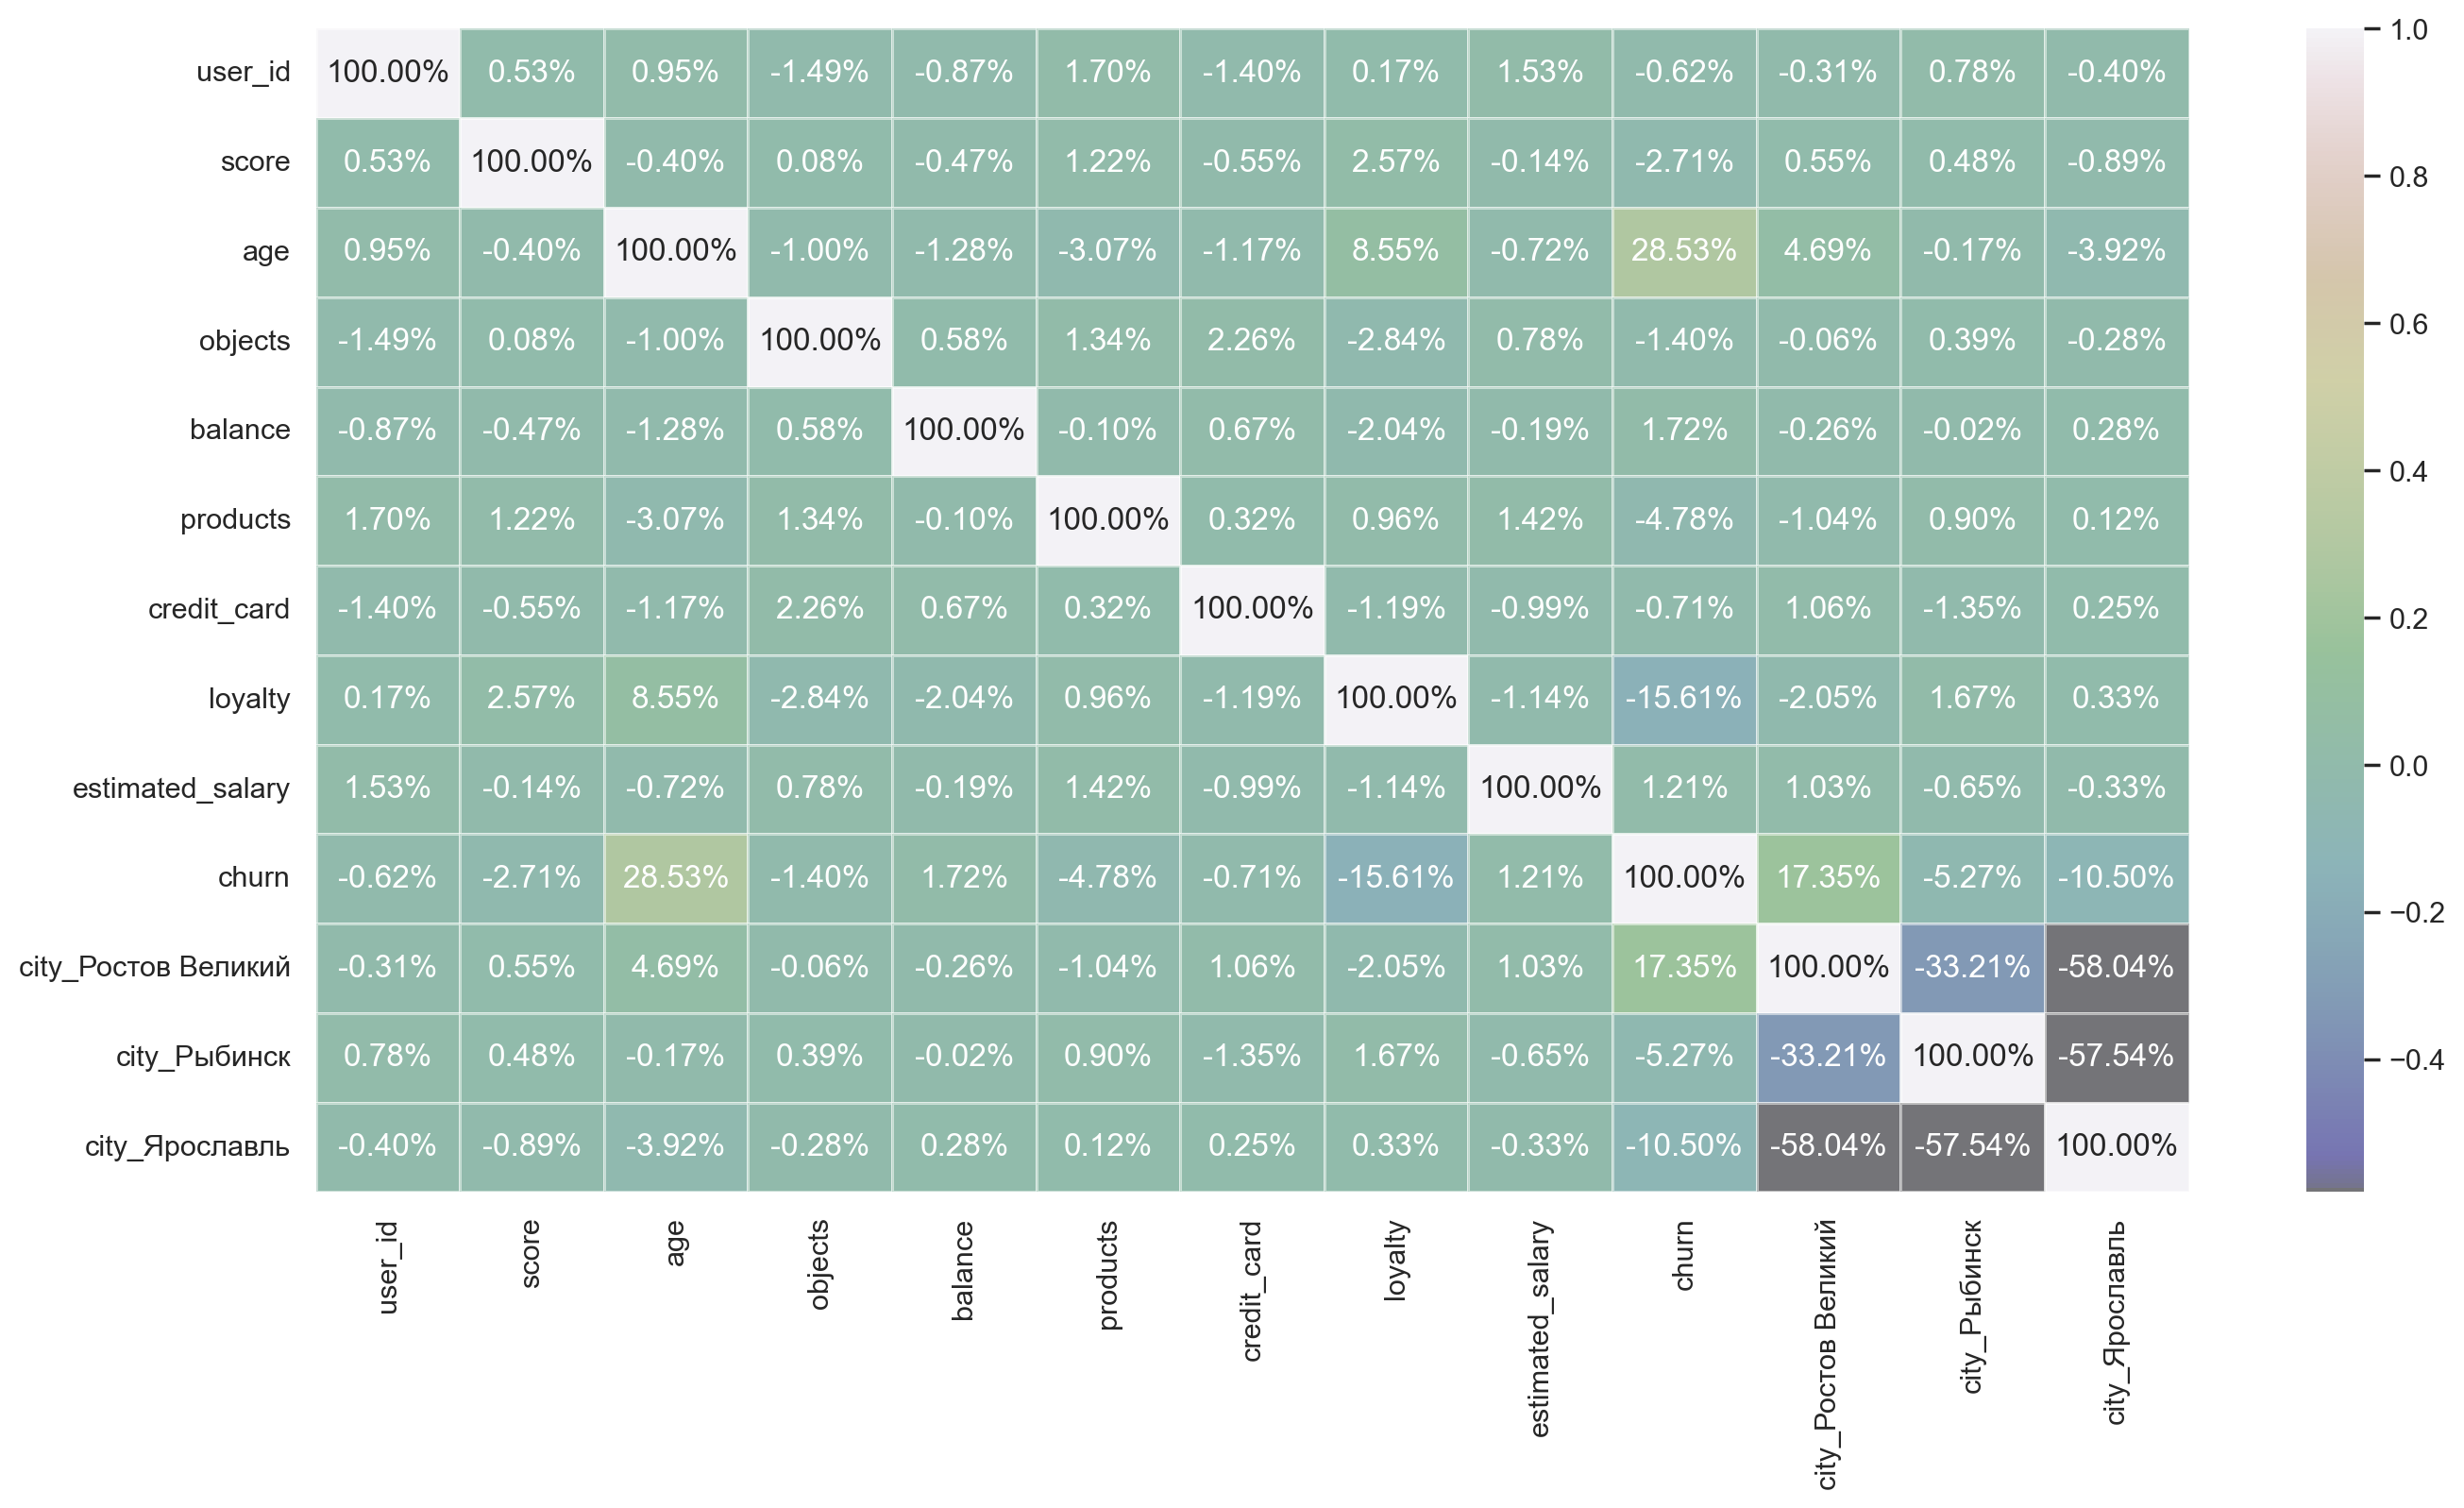

In [37]:
f, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(data_city.corr(), annot=True, linewidths=.5, ax=ax, cmap='gist_earth',fmt='.2%', alpha=.5)
plt.show()

<b>Вывод:</b> сильно влияющих на отток признаков не обнаружено.

### Сегментация пользователей по количеству продуктов.

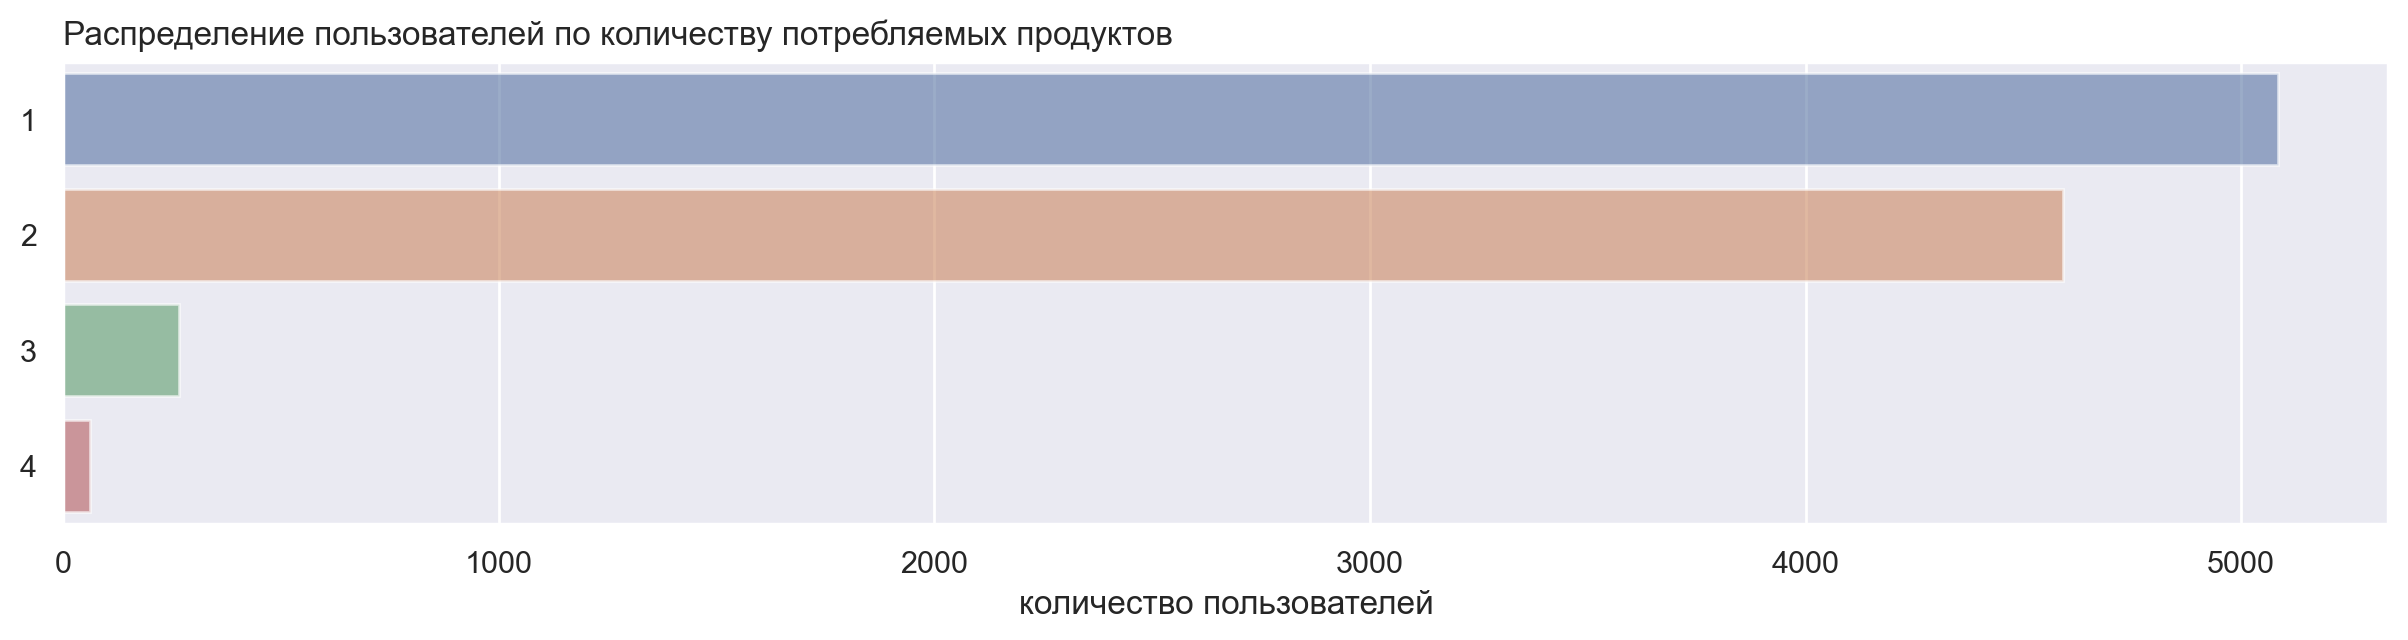

In [38]:
plt.figure(figsize=(15, 3))
ax = sns.barplot(x='count', 
                 y='products', 
                 data=data.groupby('products').agg(count=('user_id','count')).reset_index(), 
                 orient='h', alpha=0.6)
ax.set_title('Распределение пользователей по количеству потребляемых продуктов', loc='left')
ax.set_xlabel('количество пользователей') 
ax.set_ylabel('')
plt.show()

<b>Вывод:</b> большинство использует один иили два продукта.

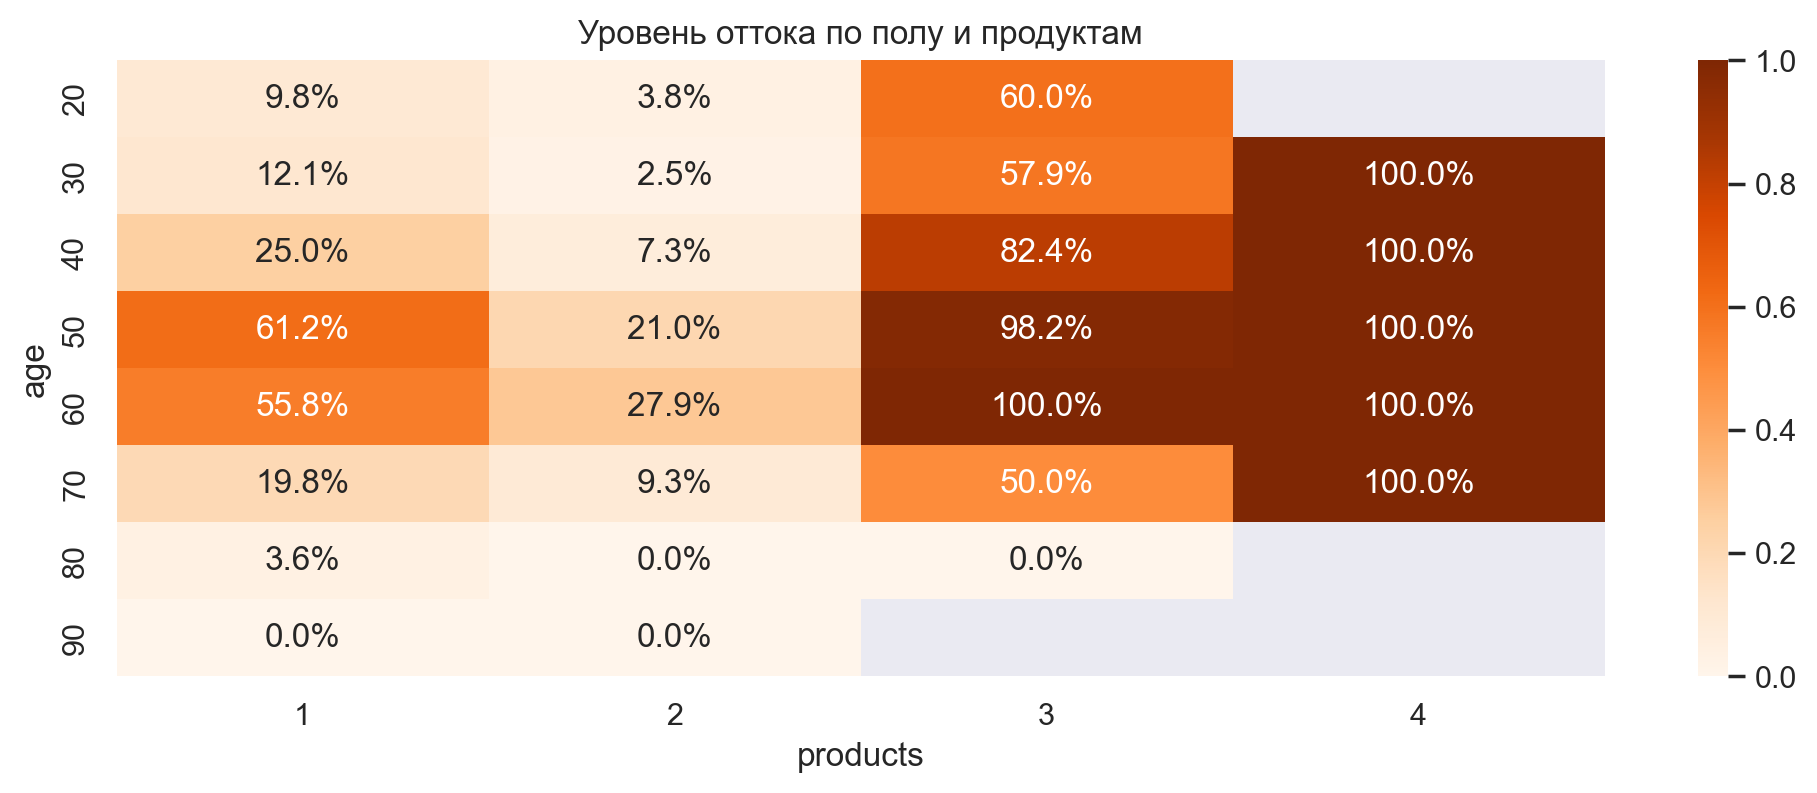

In [39]:
plt.figure(figsize=(12, 4))
sns.heatmap(data.assign(
                age = data.age.round(-1))\
            .pivot_table(
                index='age',
                columns='products',
                values='churn',
                aggfunc='mean'), 
            cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по полу и продуктам')
plt.show()

### Гистограммы распределения признаков.

In [40]:
def numeric_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))
    sns.histplot(df[df['products']==2][col], label = '2 продукта', color = '#184562', ax = plt.subplot(1, 2, 1), alpha=.4)
    sns.histplot(df[df['products']==3][col], label = '3 продукта', color = '#189562', ax = plt.subplot(1, 2, 1), alpha=.4)
    sns.histplot(df[df['products']==4][col], label = '4 продукта', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.4)
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    sns.boxplot(y = col, x = 'products', data = df, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(4), ('1 продукт', '2 продукта','3 продукта', '4 продукта'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [41]:
def categorical_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'products', data = df, ax = plt.subplot(1, 2, 1),  palette='Pastel2')
    plt.ylabel('количество пользователей')
    plt.xlabel('')
    plt.legend() 
    
    gr = df.groupby([col, 'products']).agg(count=('user_id', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    
    plt.xlabel('')
    plt.ylabel('')
    
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [42]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'objects', 'balance', 'estimated_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Количество объектов недвижимости в собственности', 
                                   'Баланс','Заработная плата клиента']
                       })

categorical = pd.DataFrame({'col' : ['gender', 'city', 'credit_card', 'loyalty', 'churn'],
                            'title' : ['Пол', 'Город', 'Наличие кредитной карты', 'Активность', 'Отток']
                            })

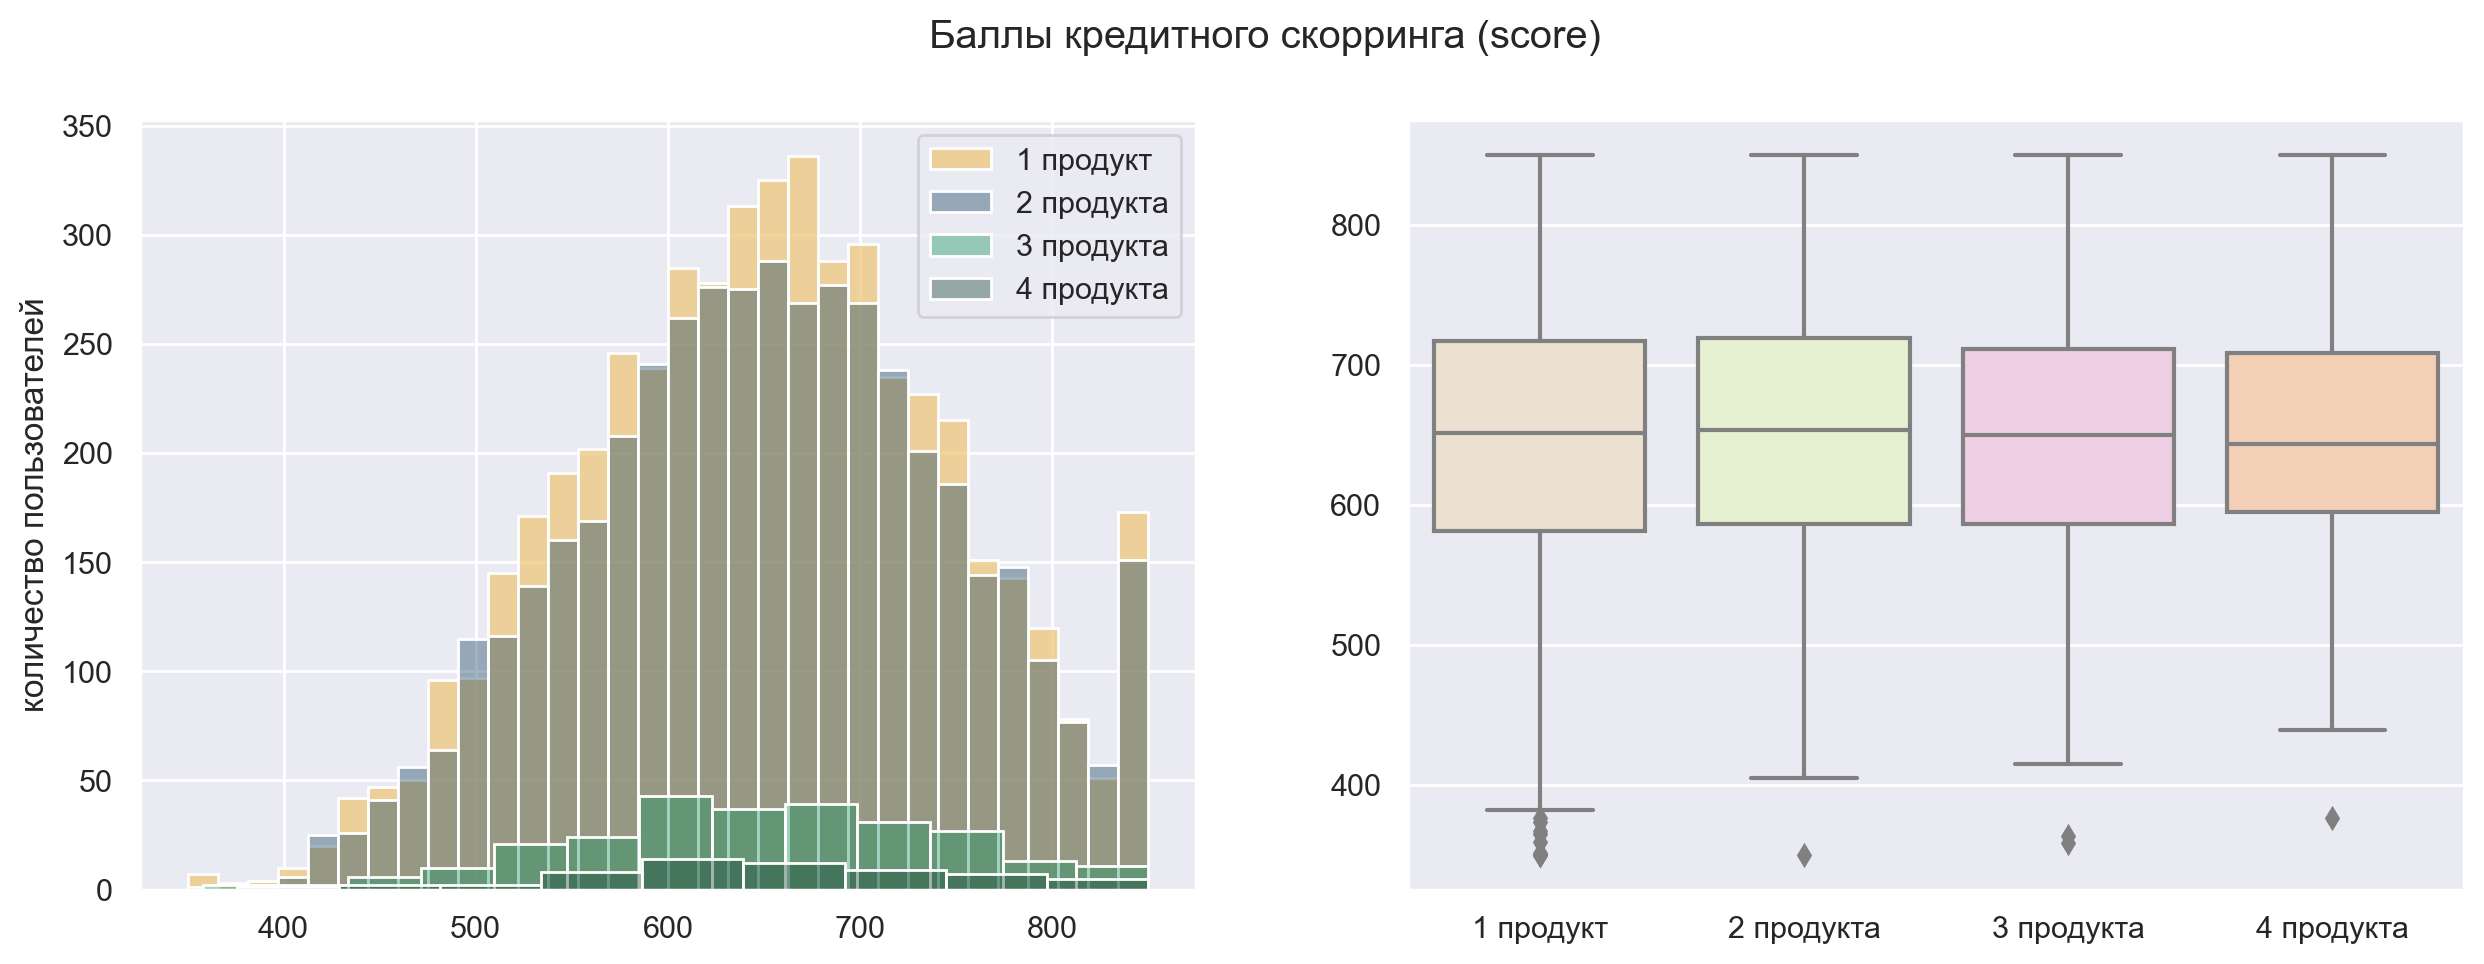

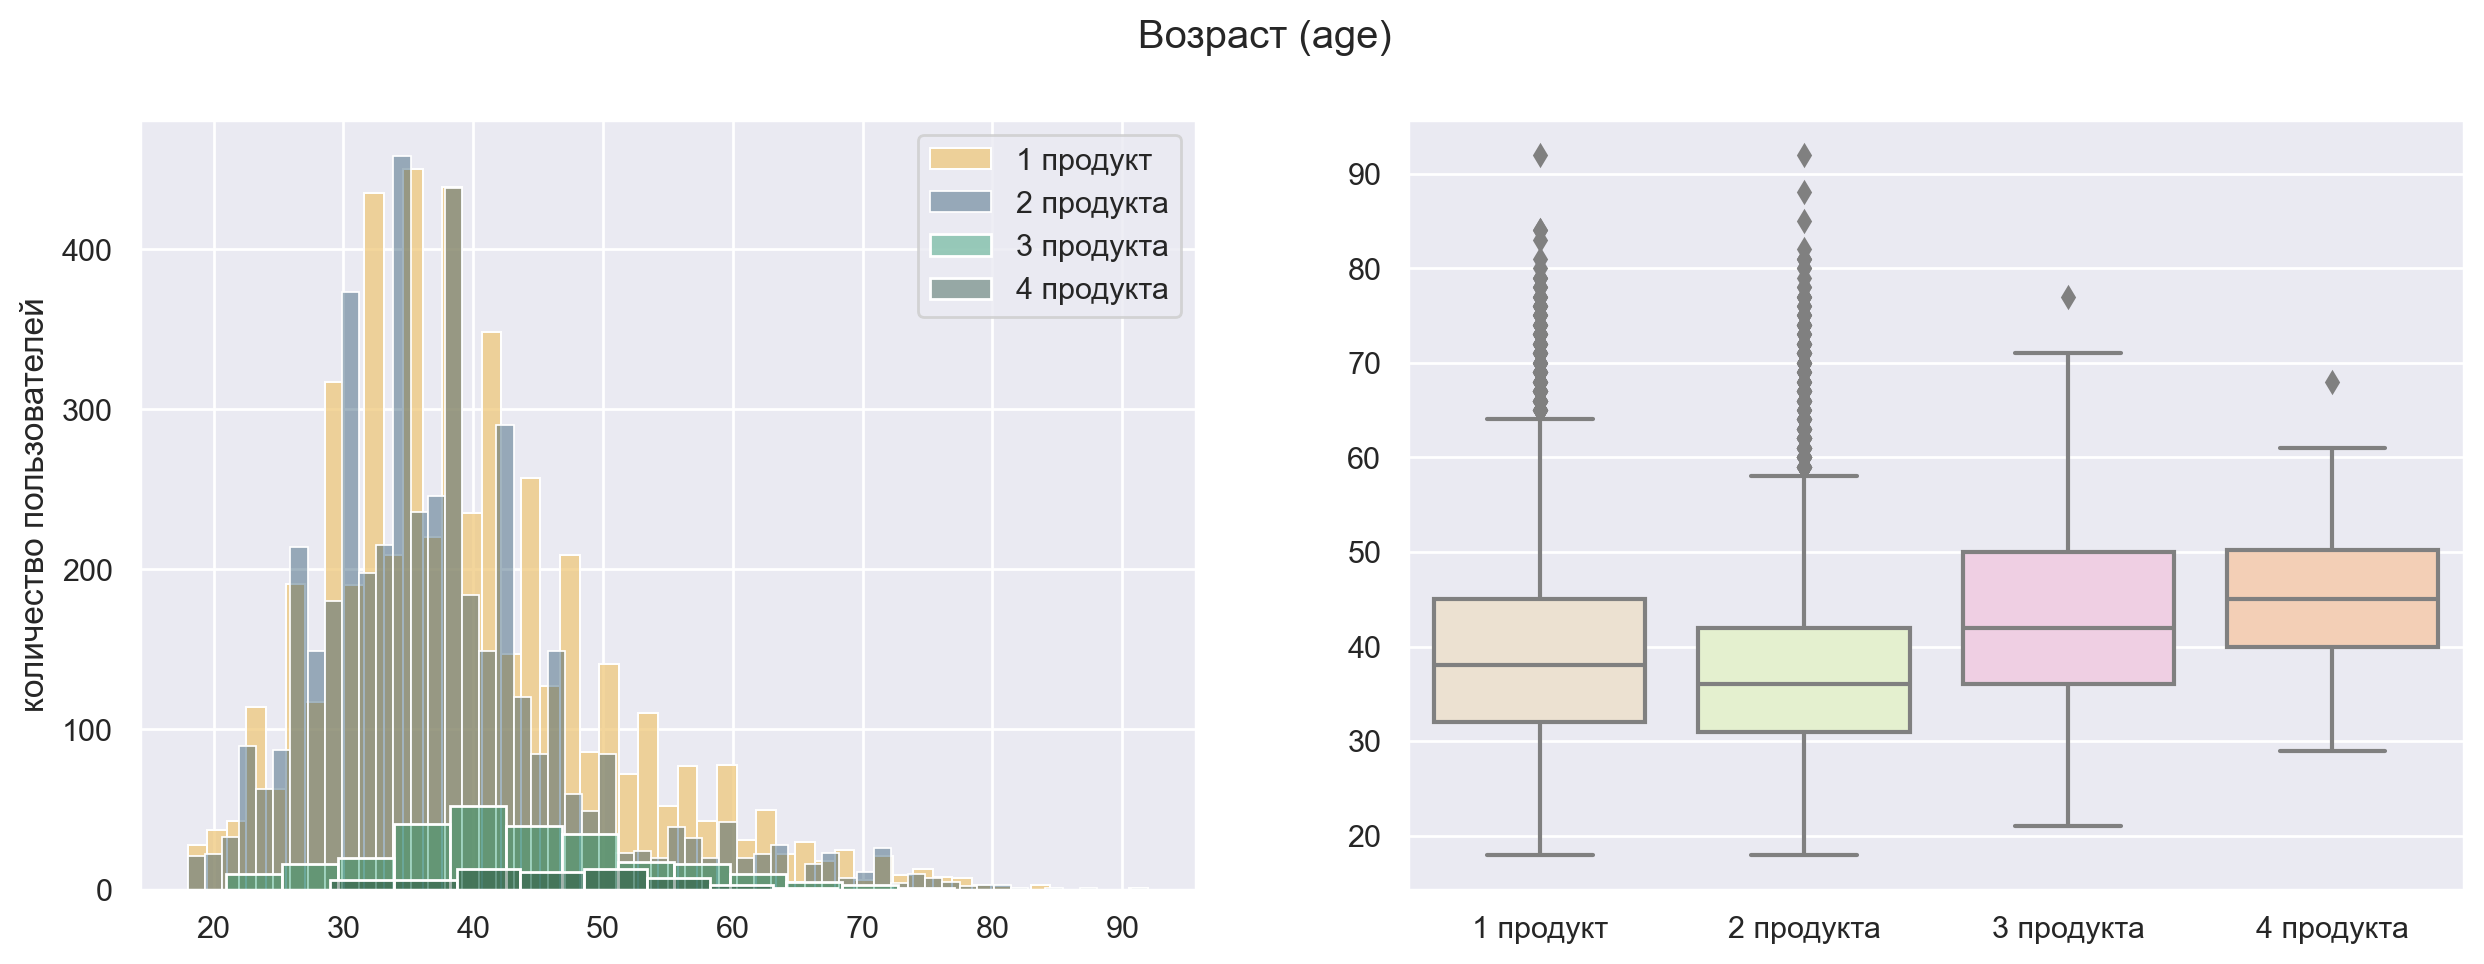

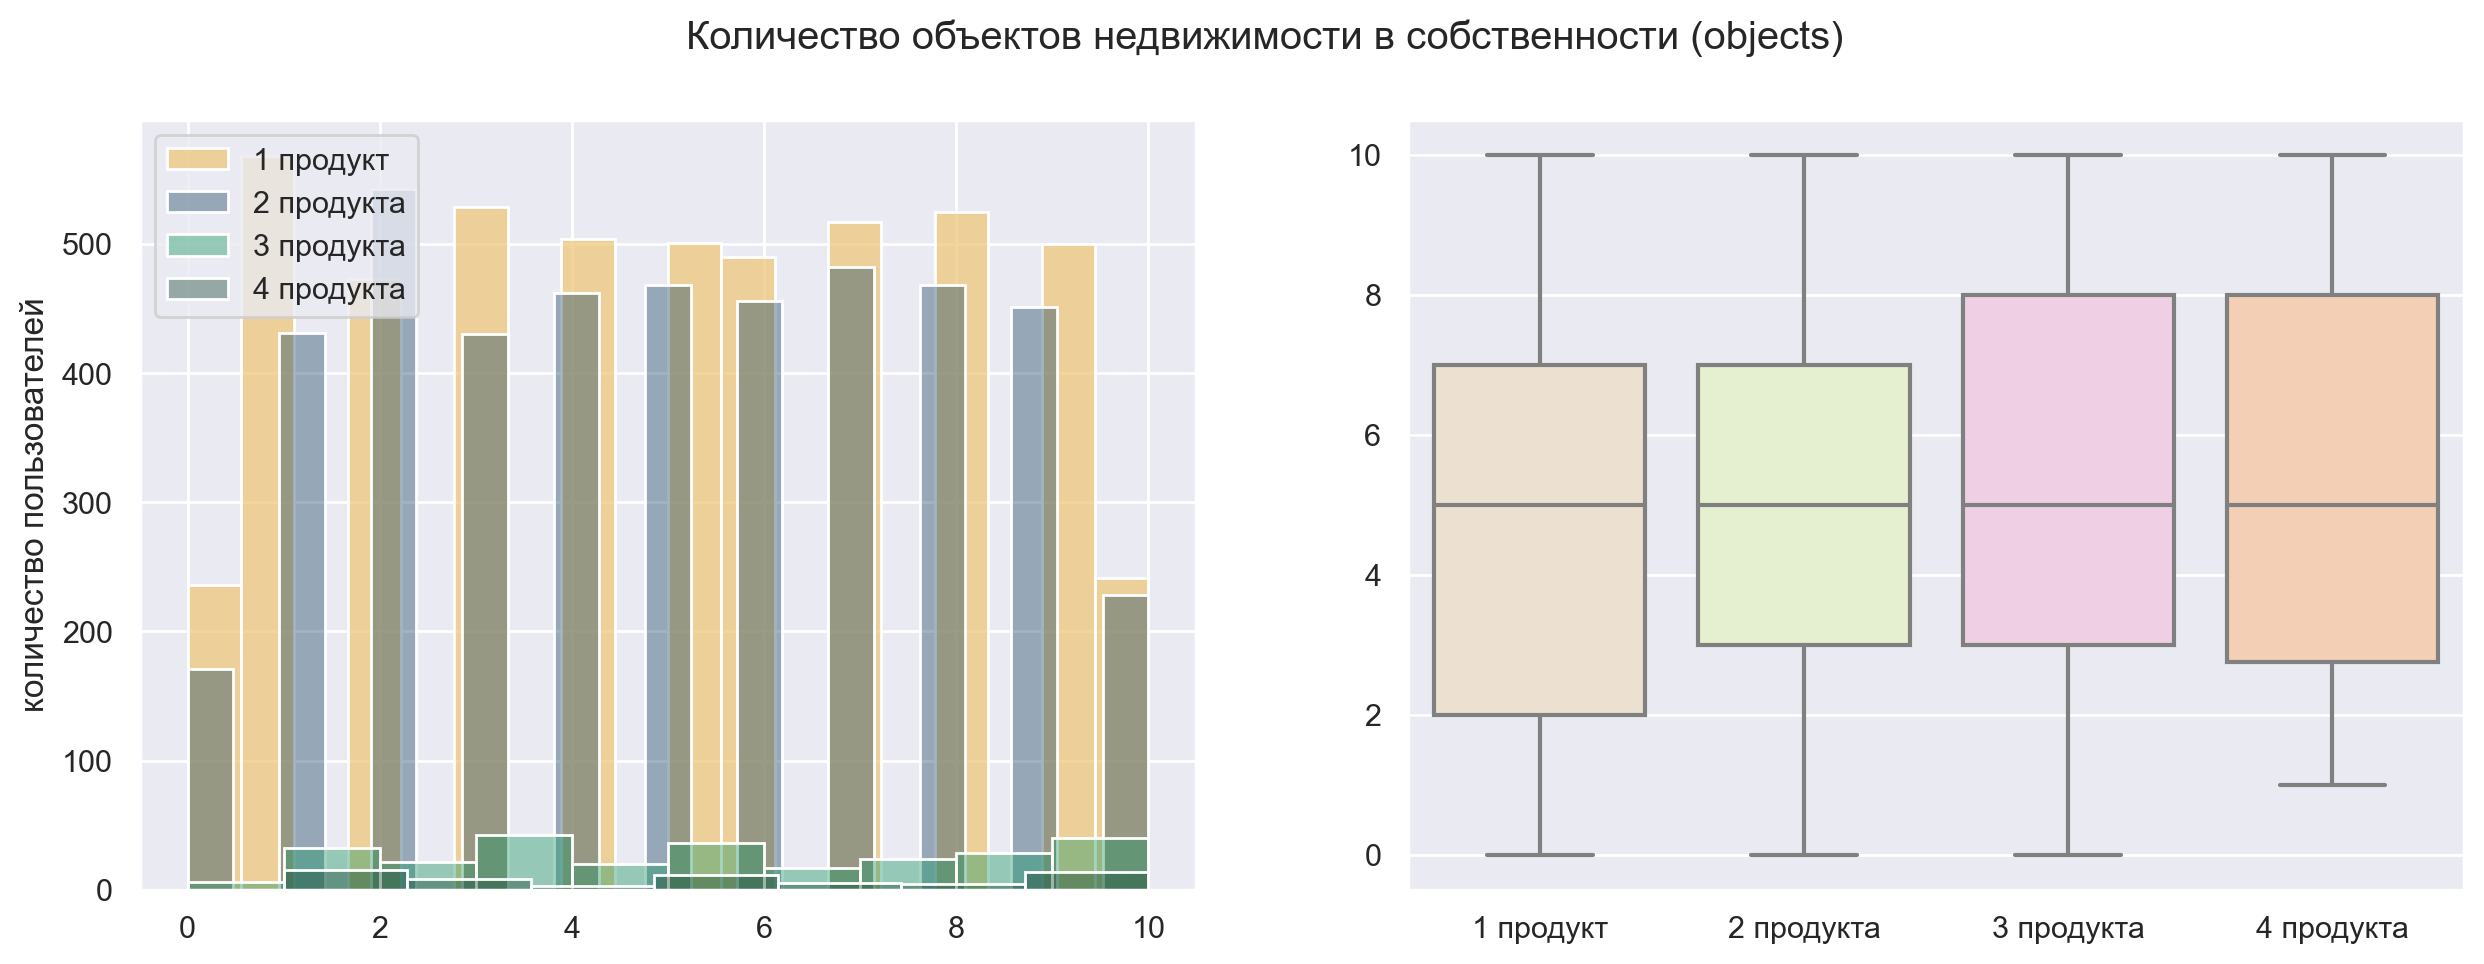

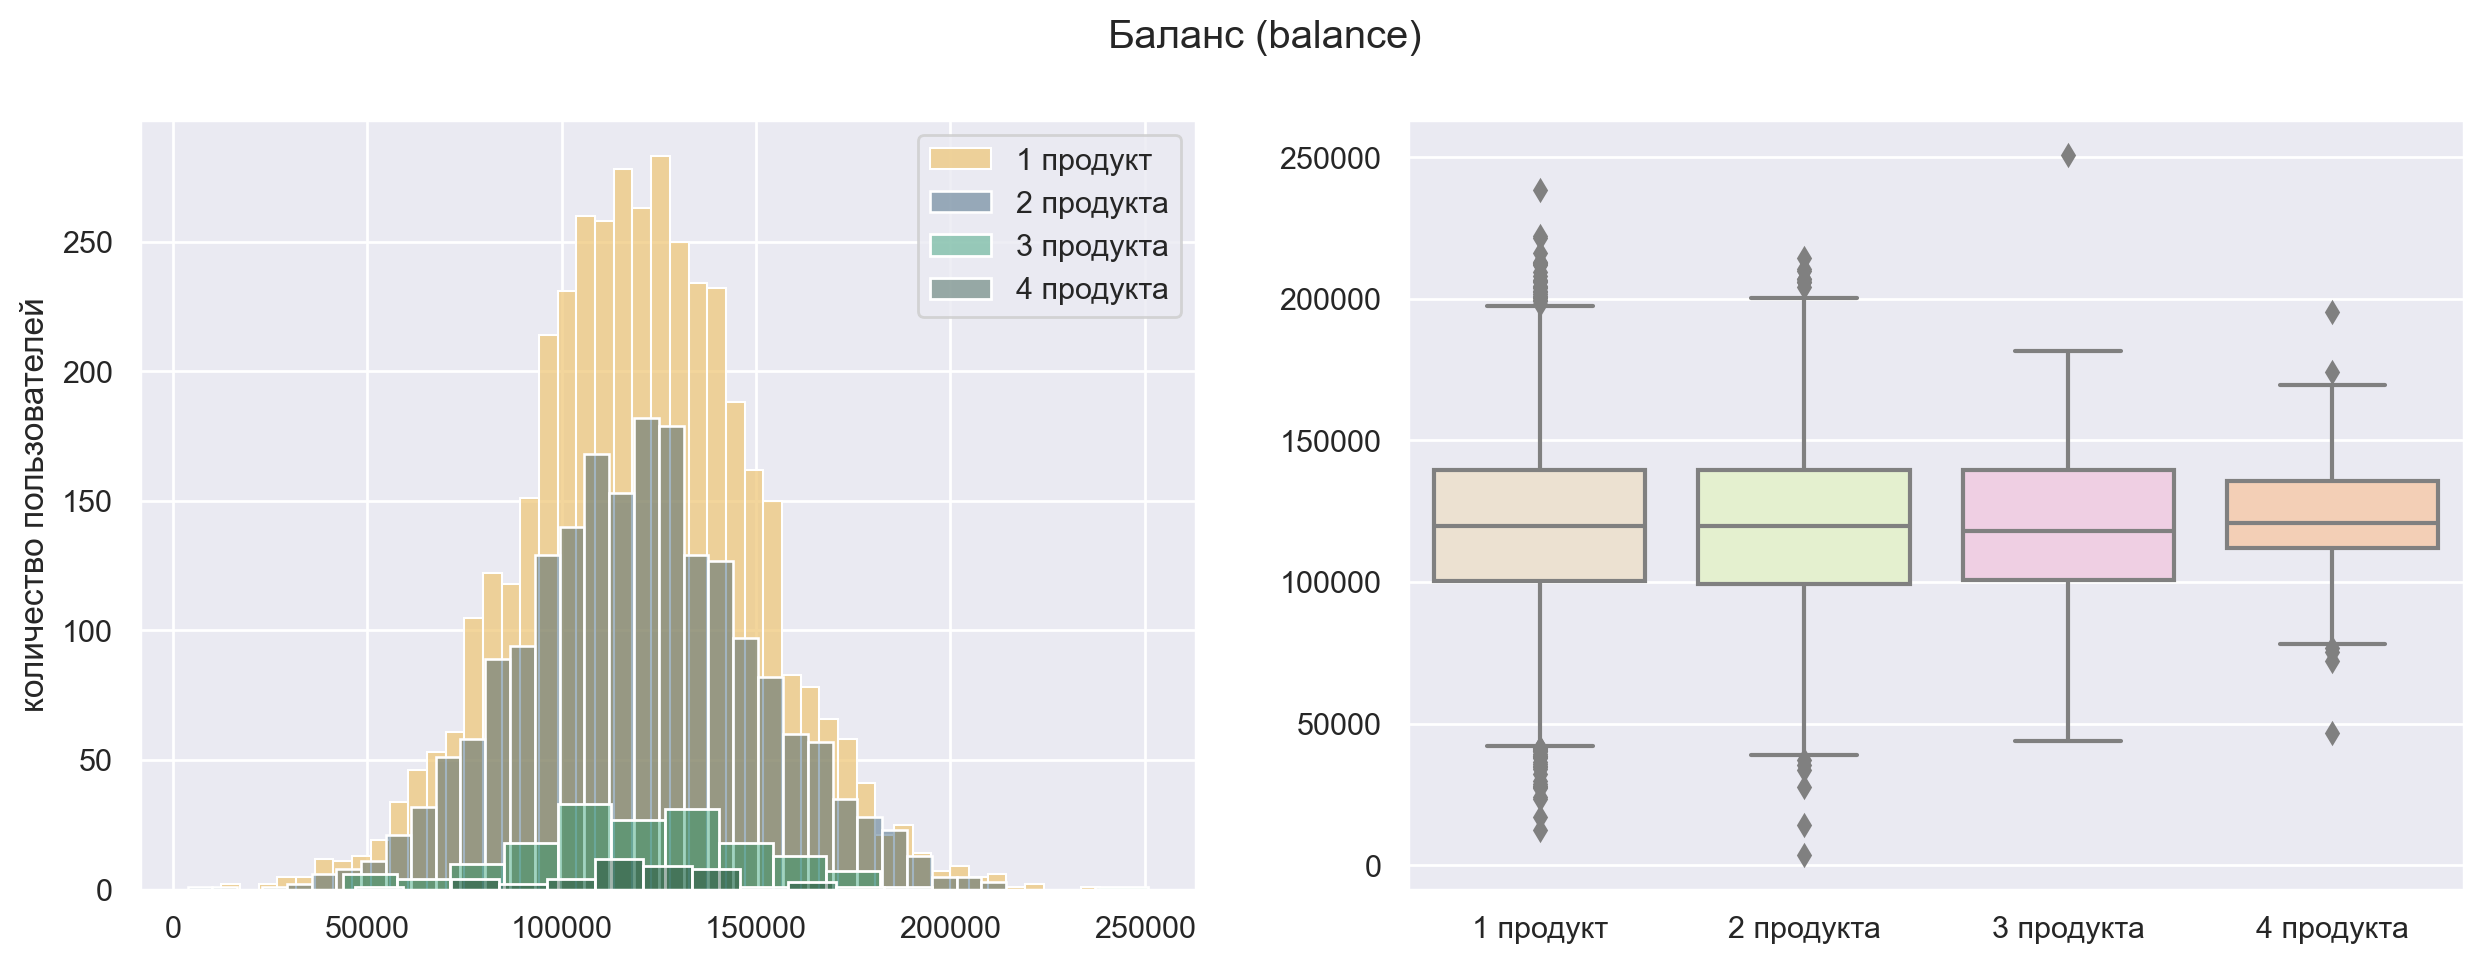

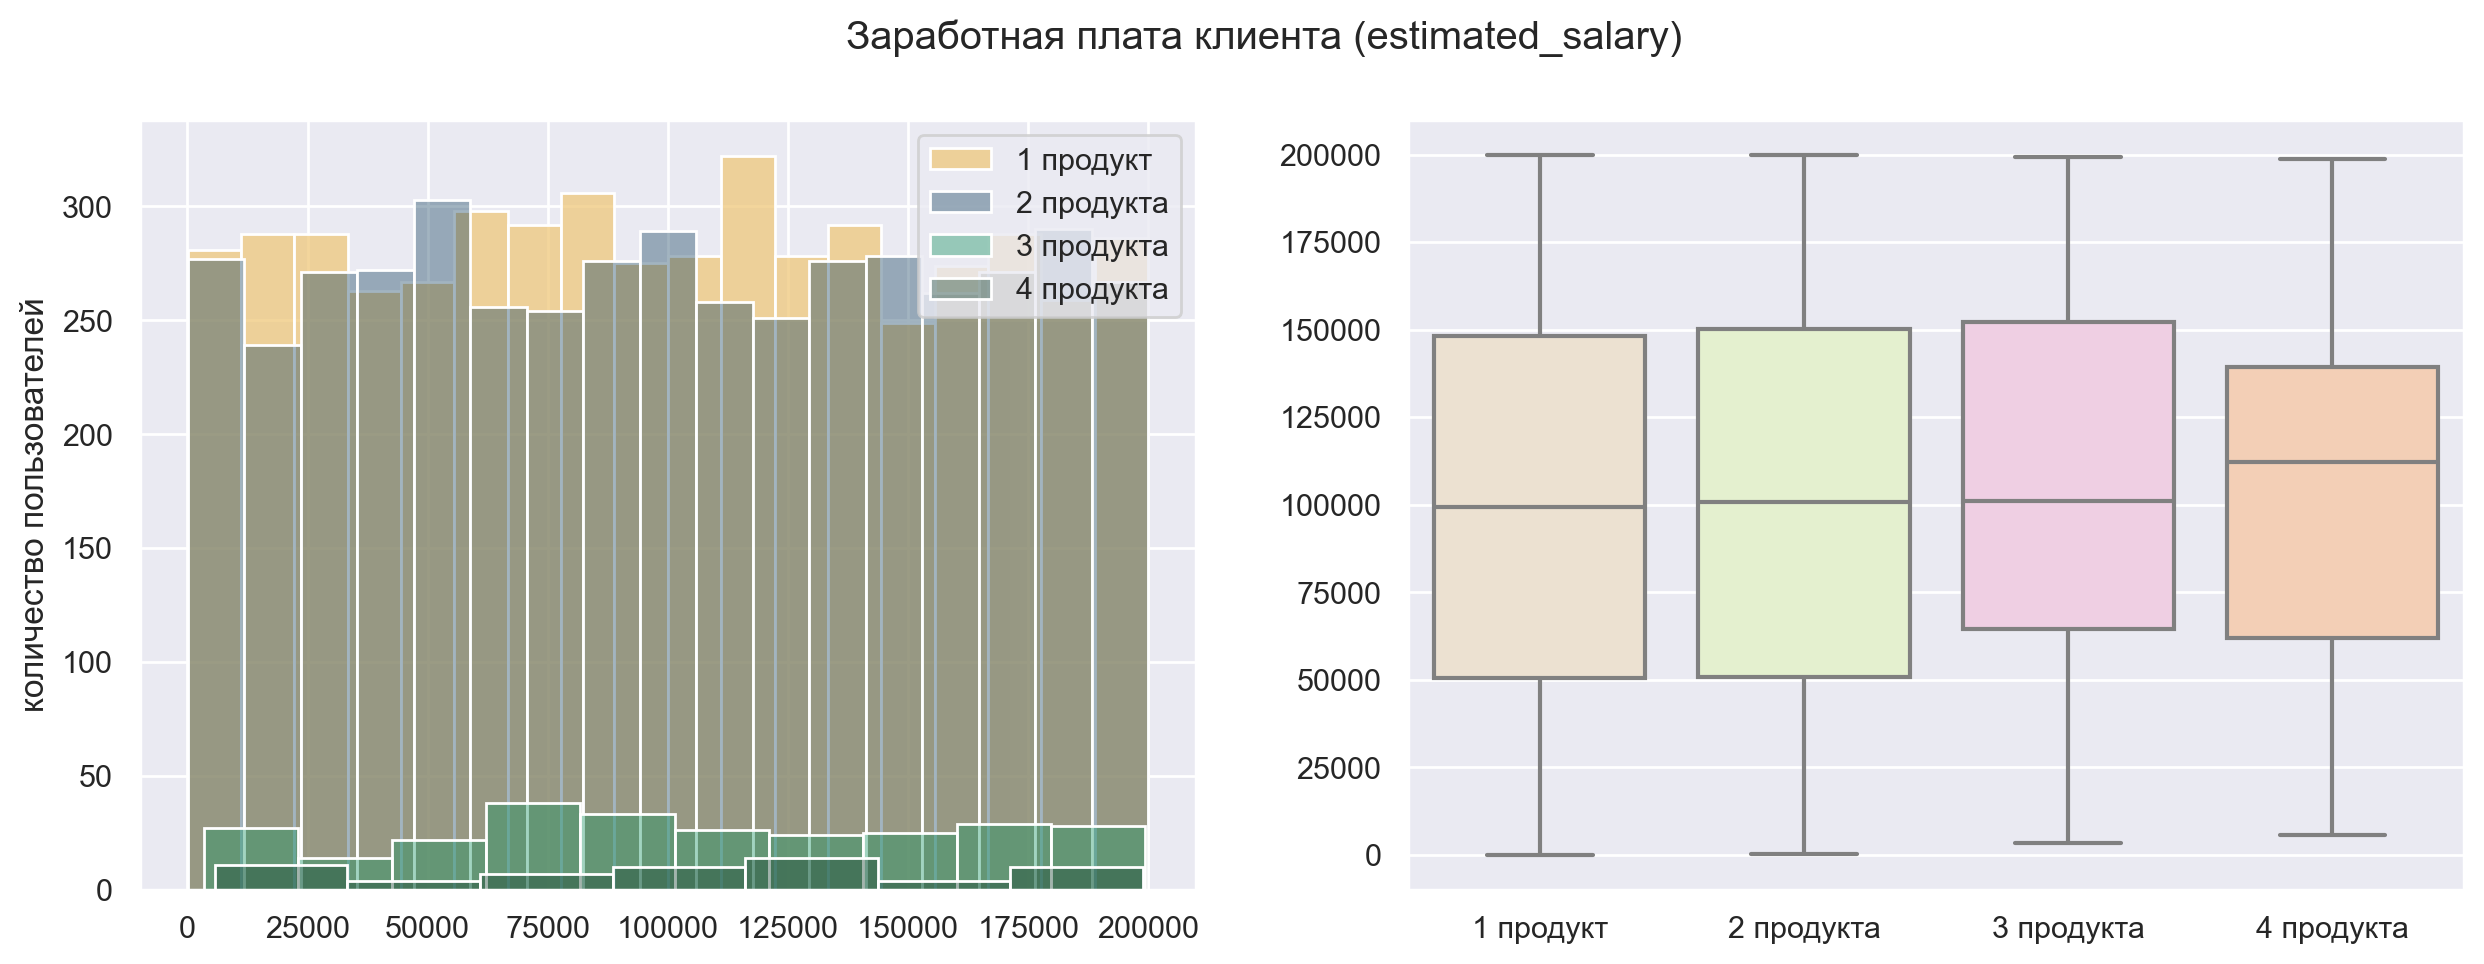

In [43]:
for index, row in numeric.iterrows():
    numeric_plots(data, row[0], row[1])

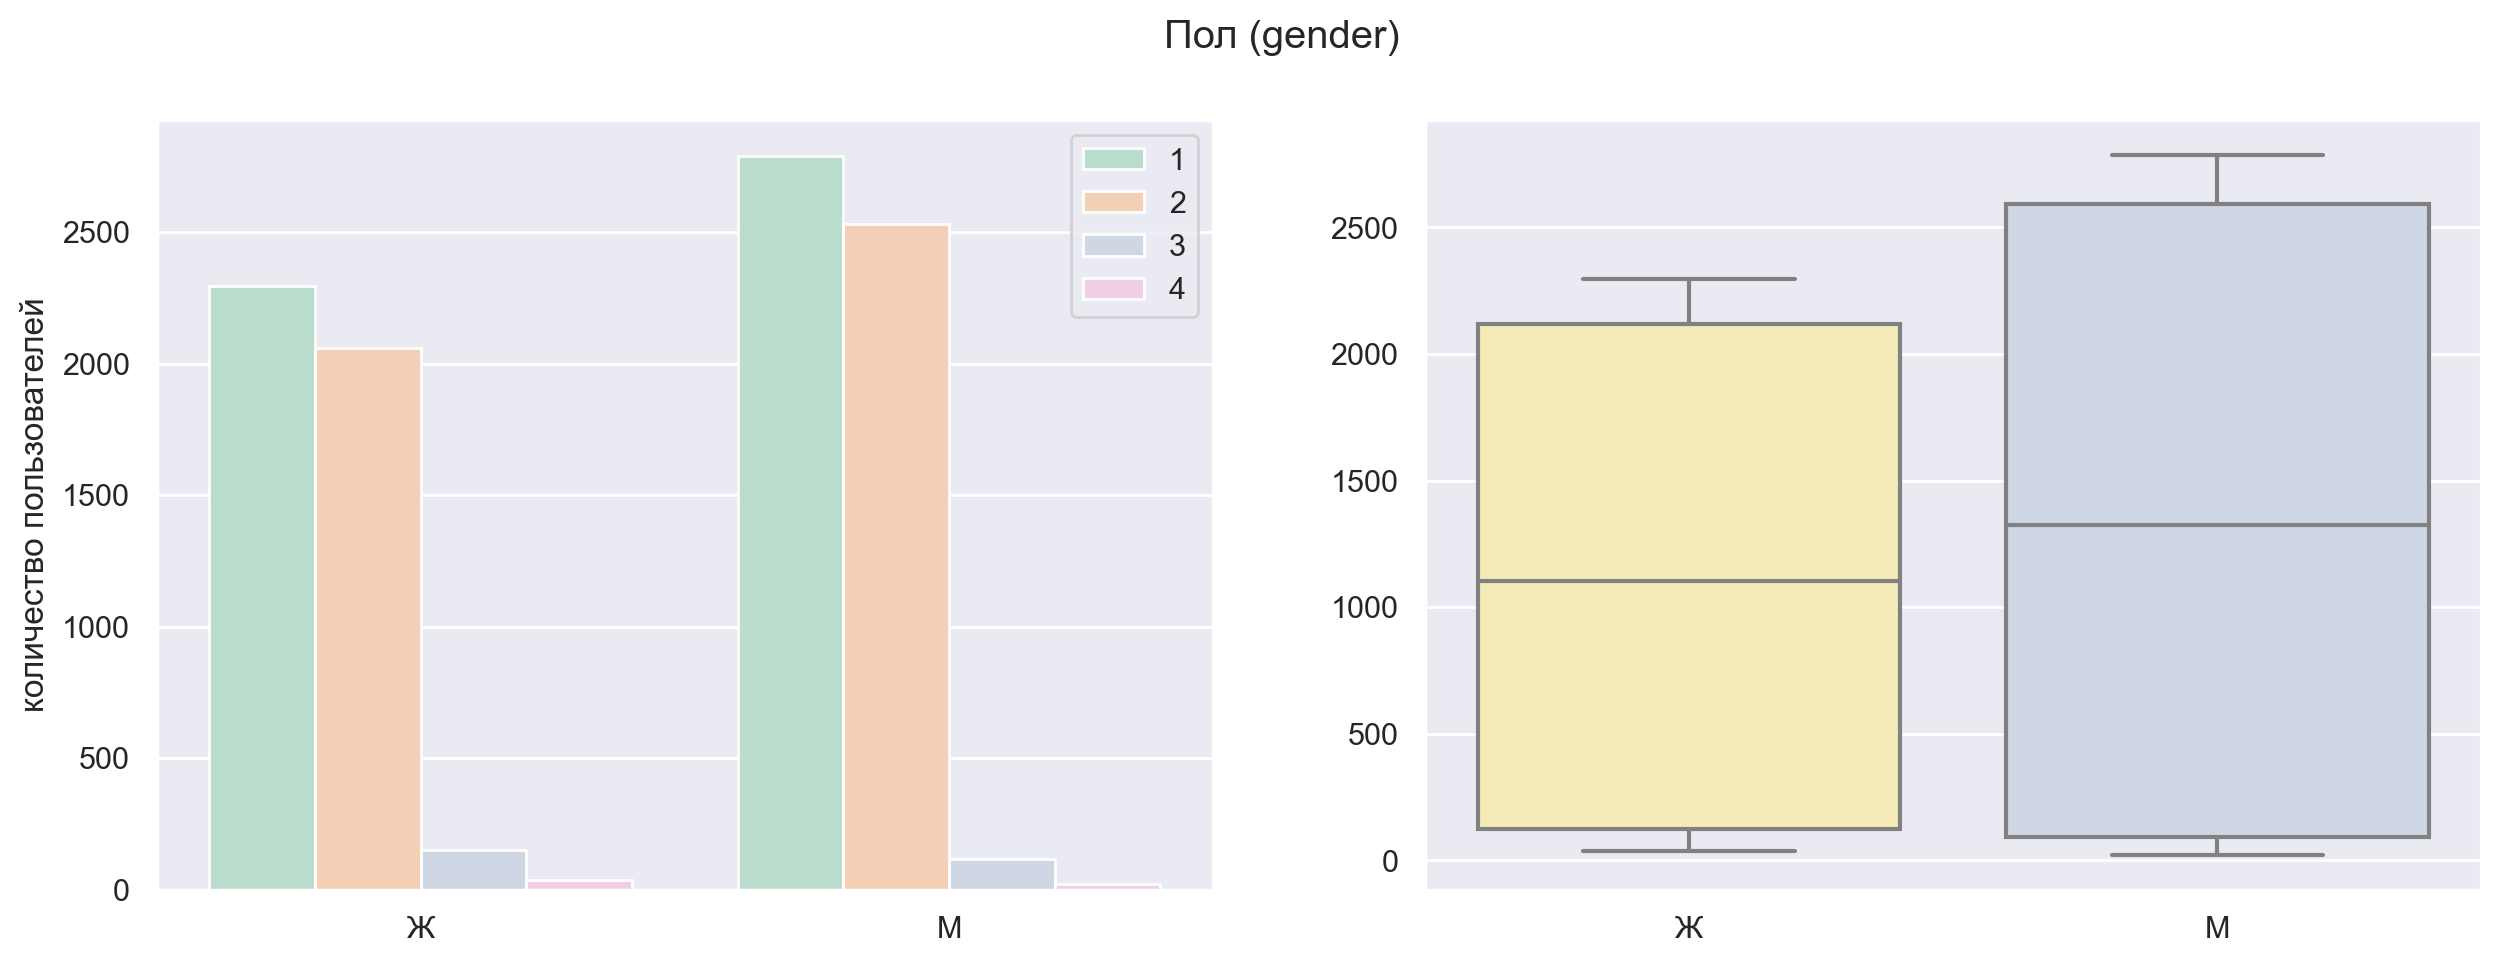

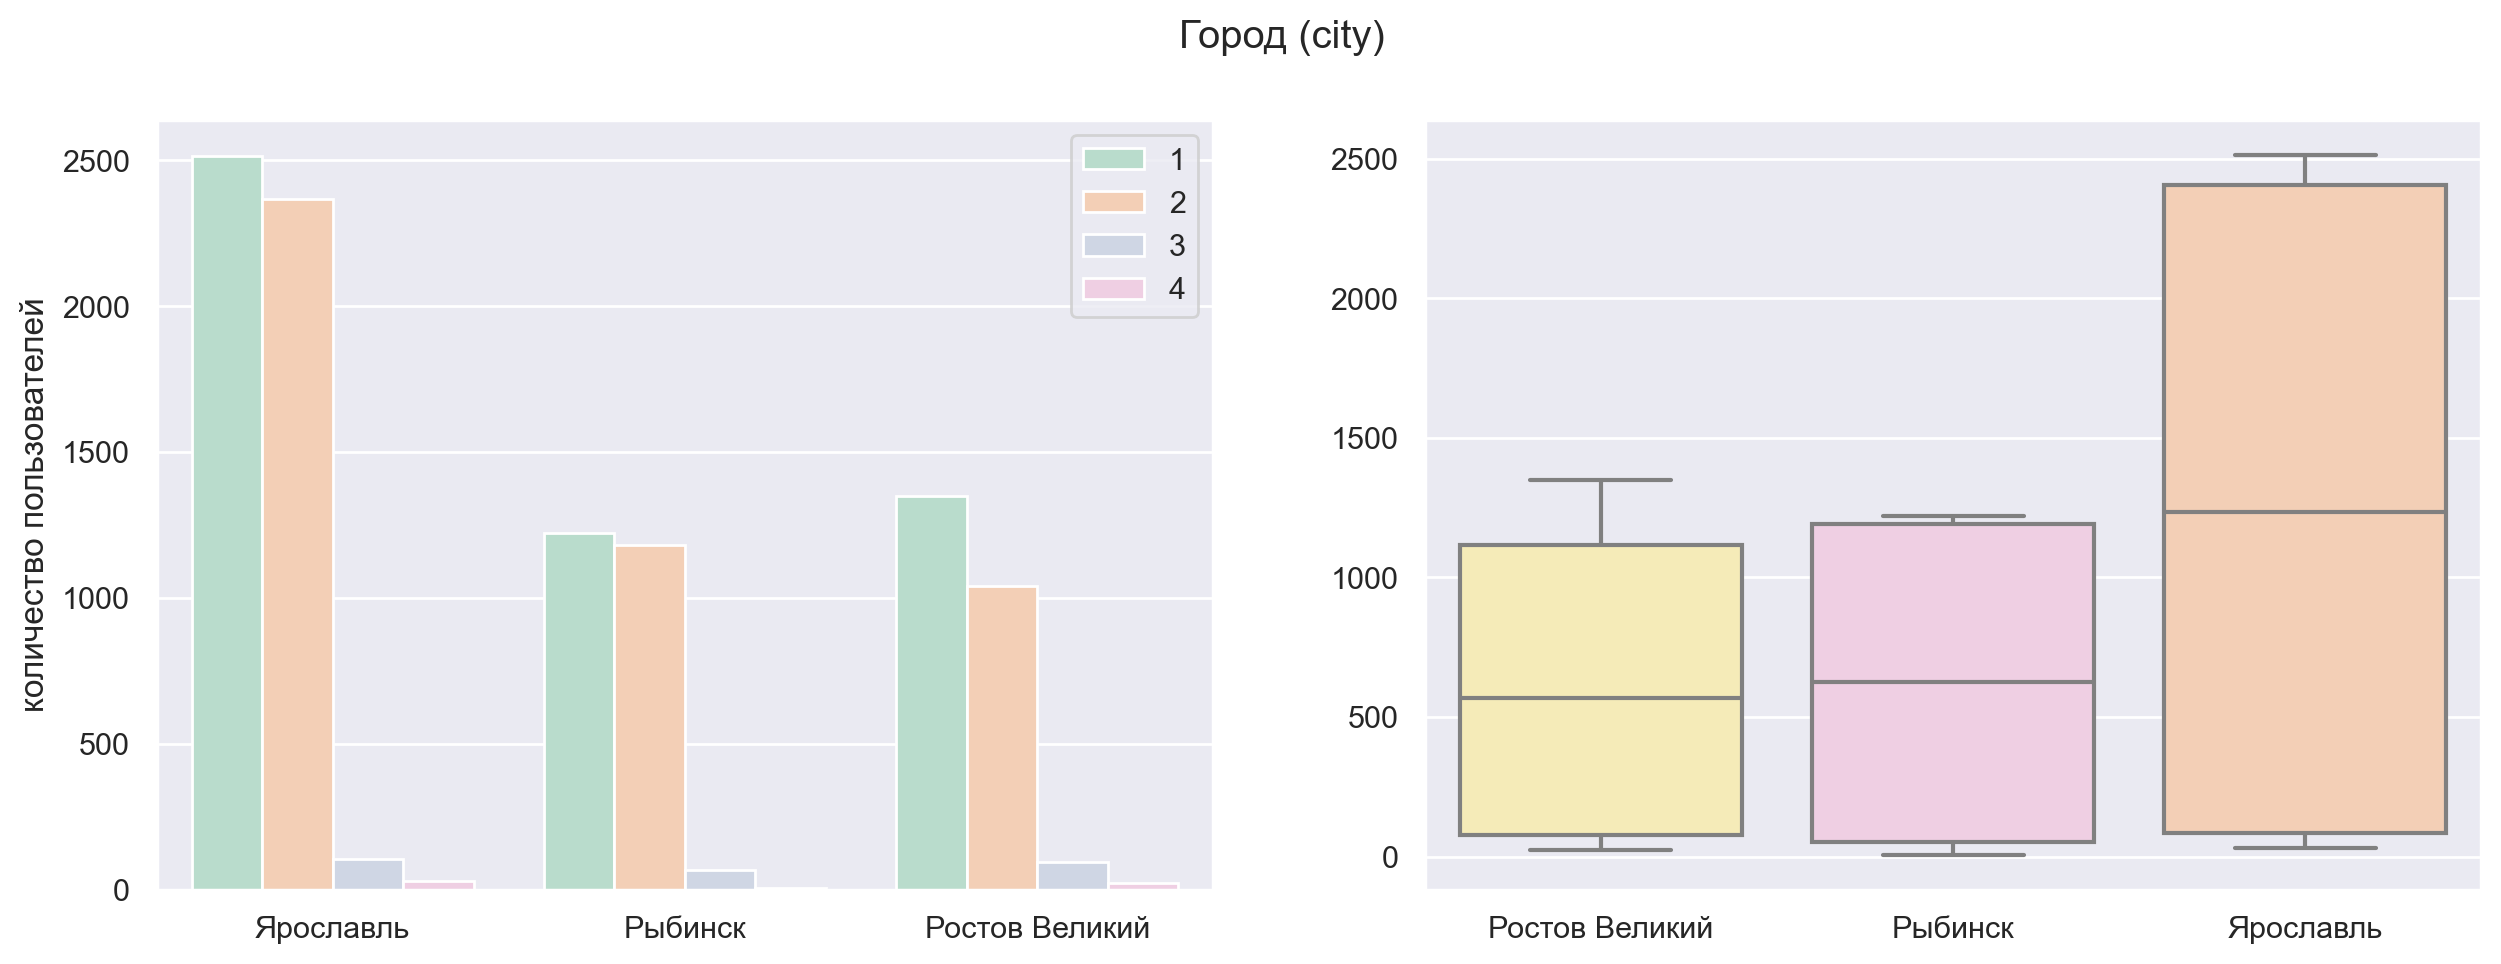

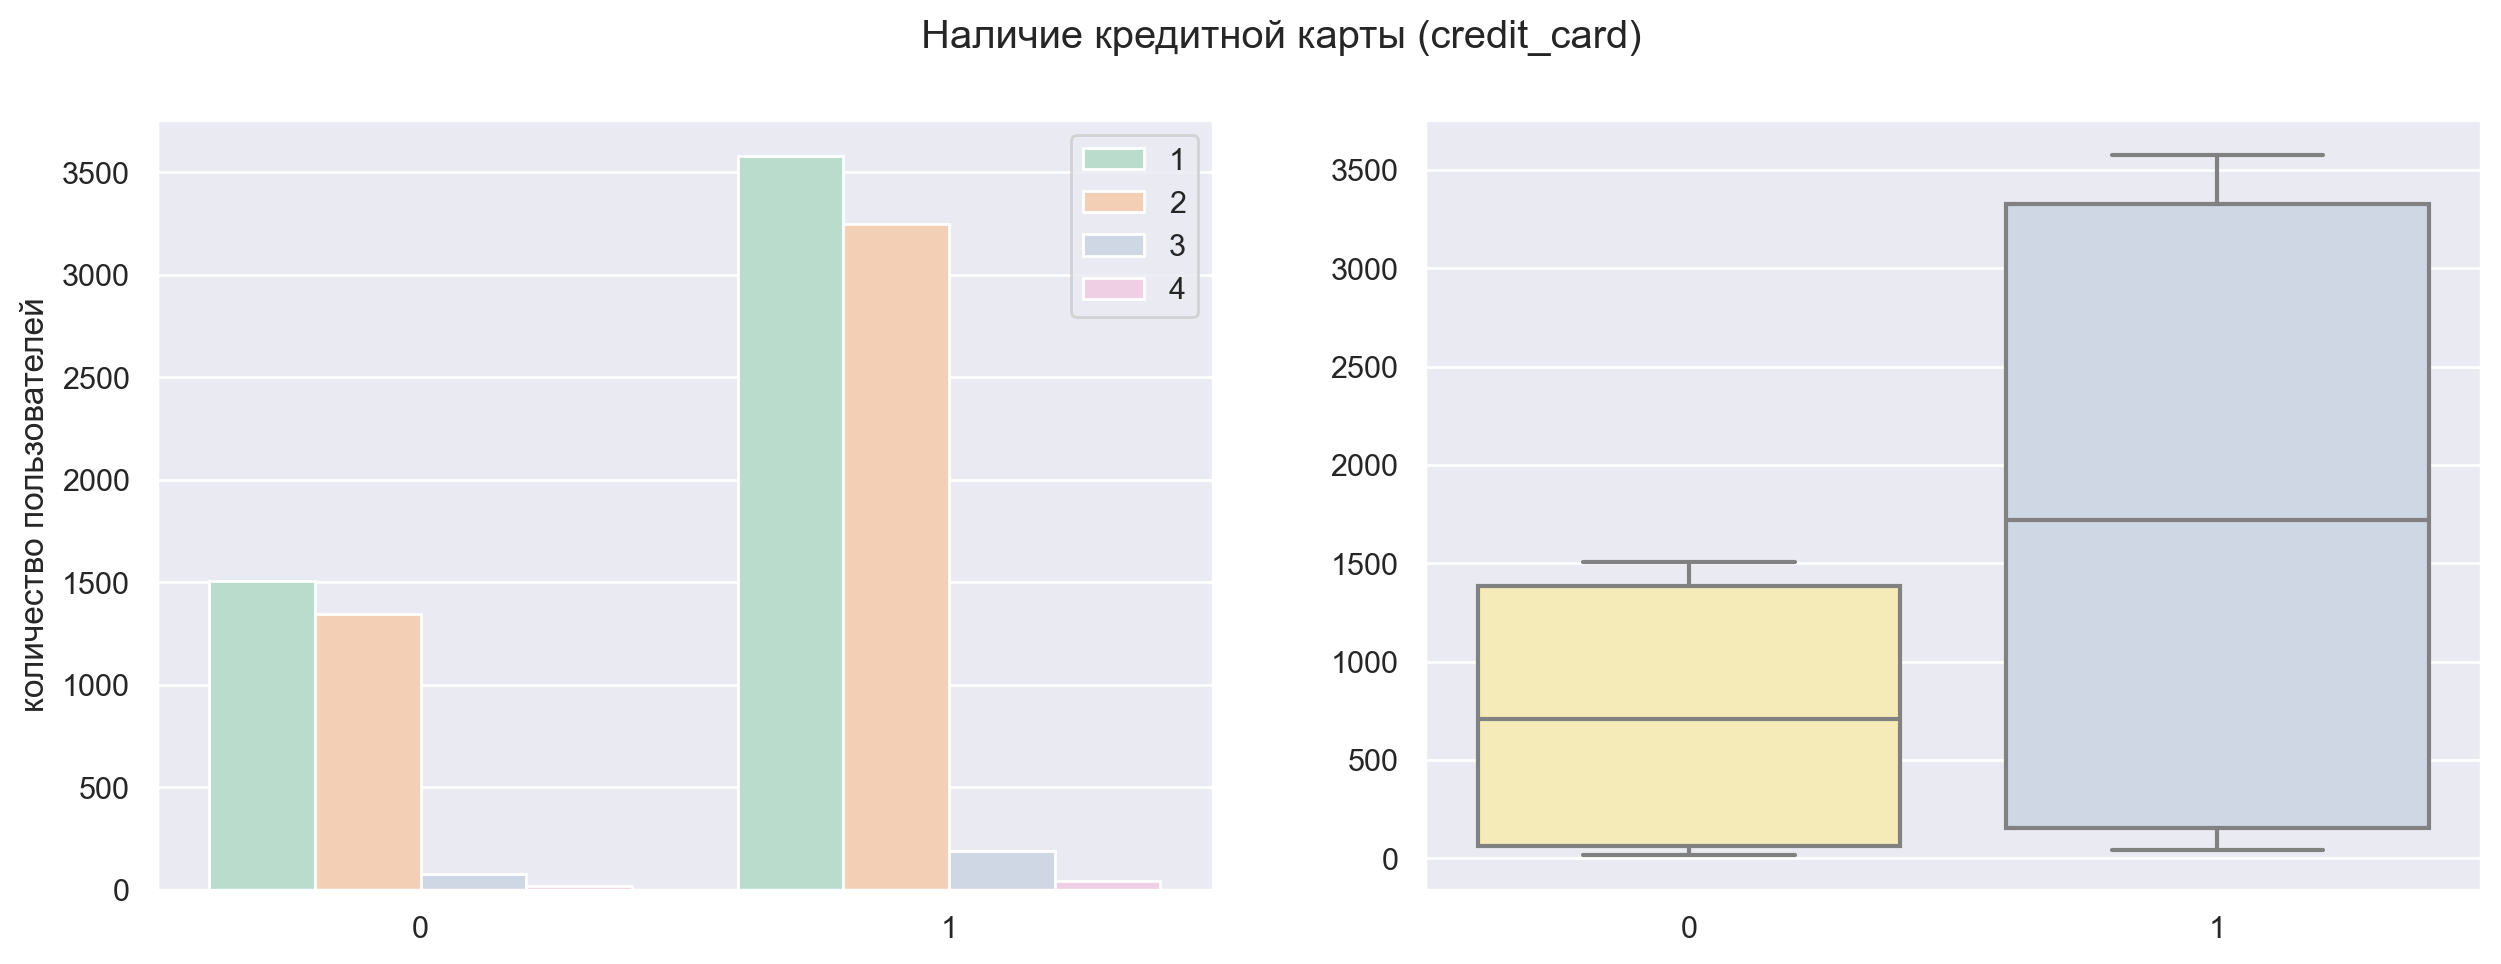

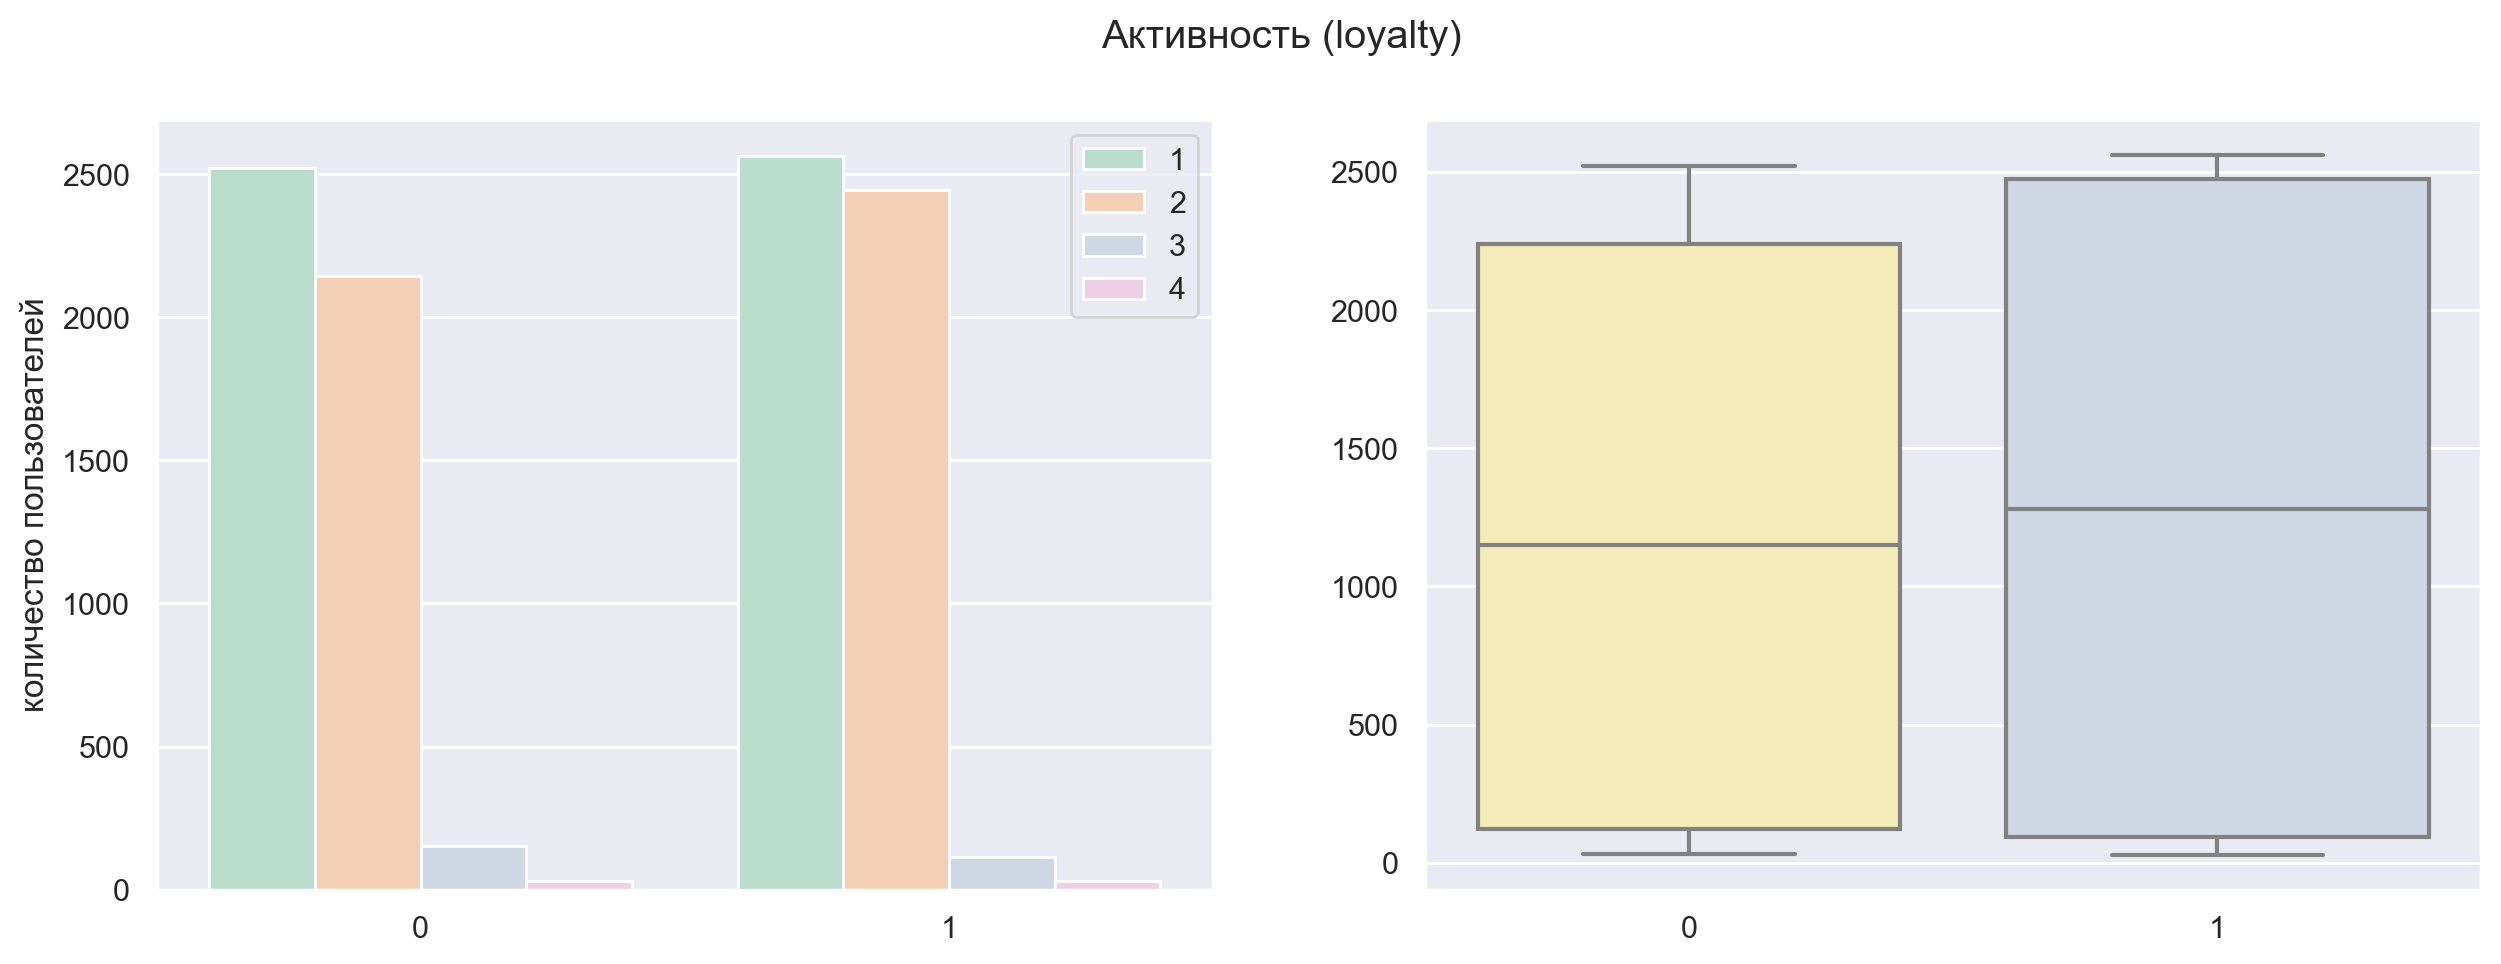

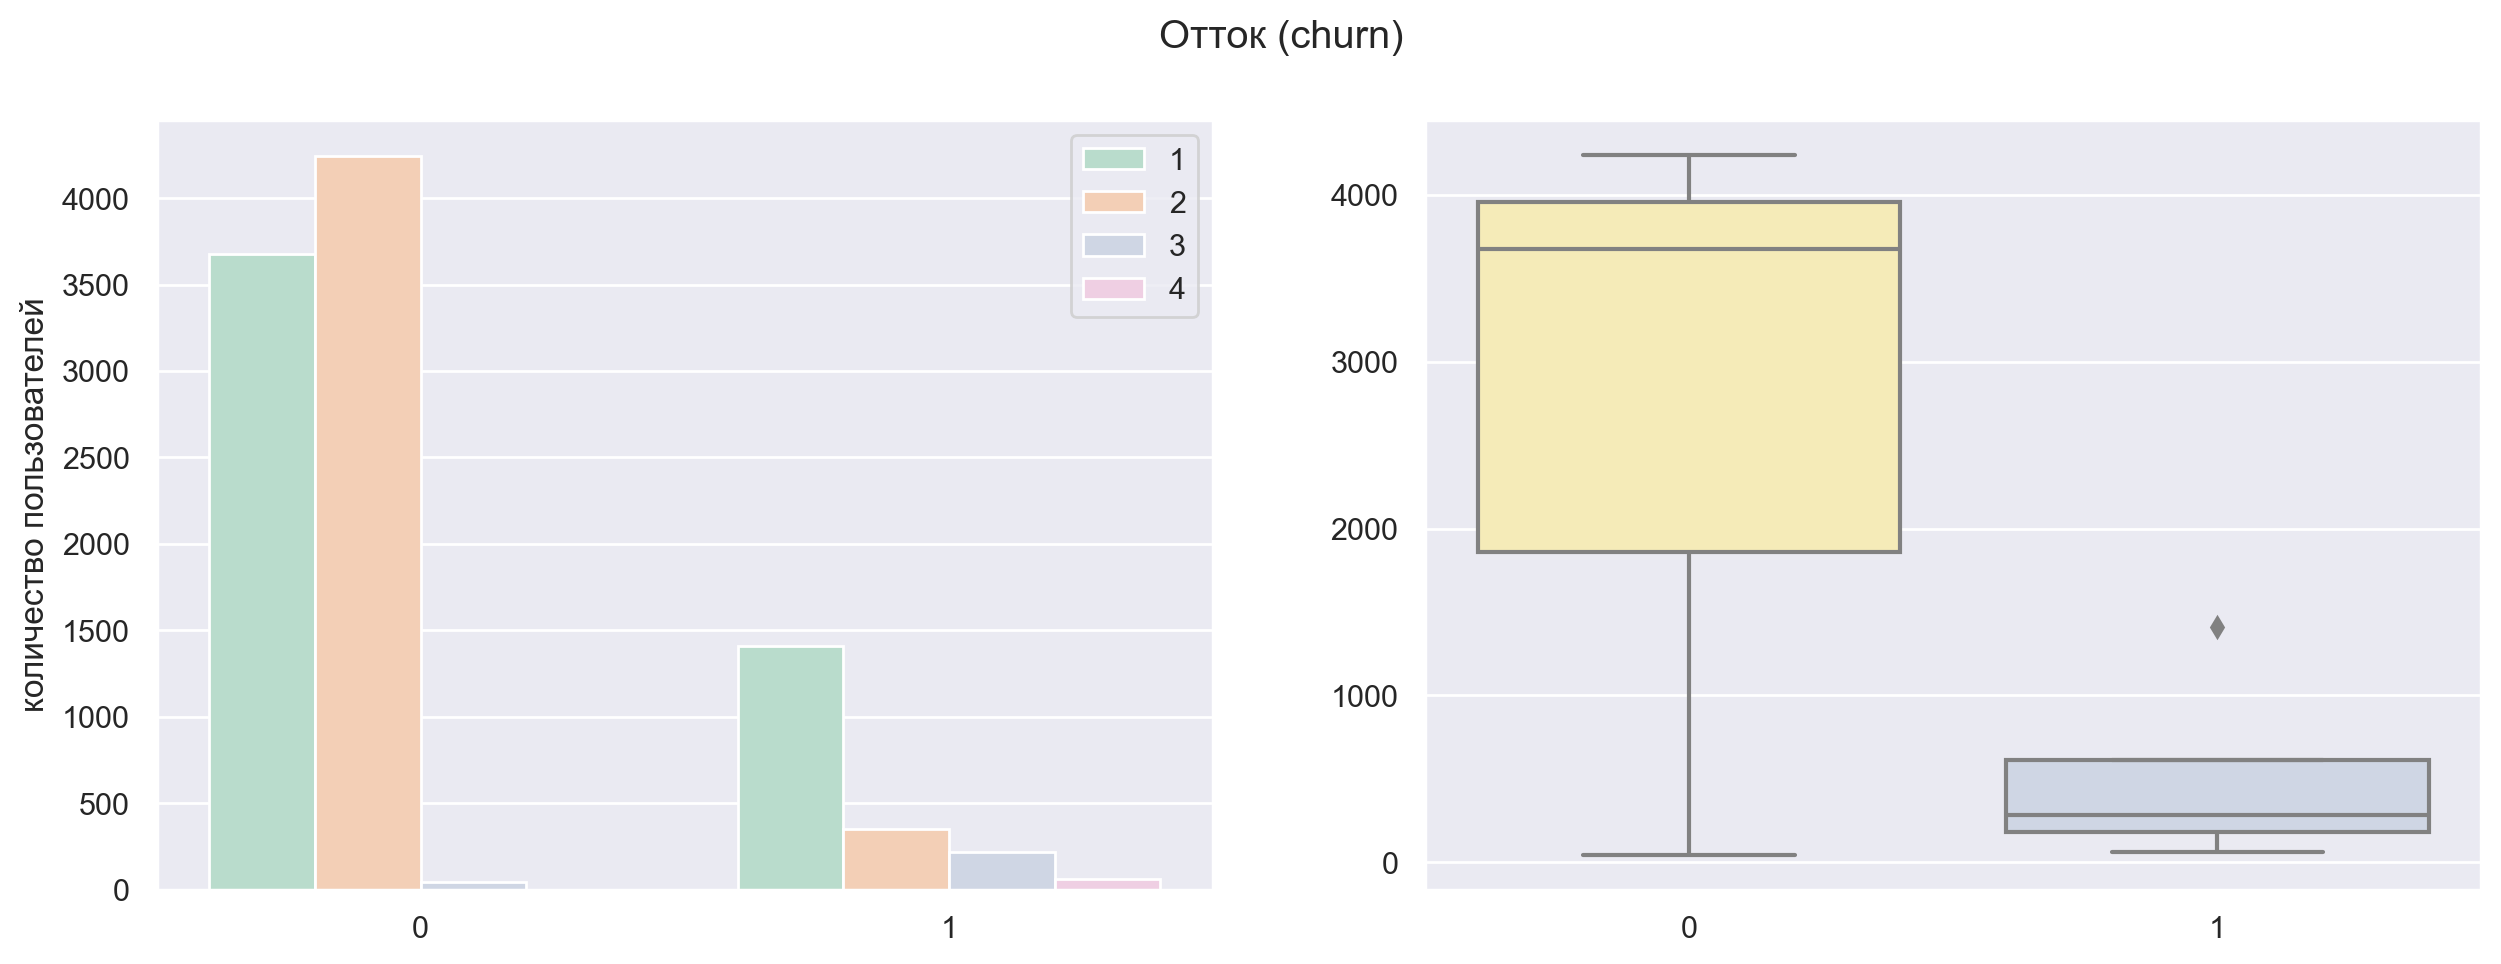

In [44]:
for index, row in categorical.iterrows():
    categorical_plots(data, row[0], row[1])

<b>Вывод:</b> мы выявили пользователей c одним продуктом - широкий возрастной диапазон, примущественно мужчины, чаще - жители Ярославля;
пользователей с 2 продуктами - имеет наименьший отток 8%;
пользователей 3 и более продуктов - более страшего возраста, примущественно женщины, активность - низкая, сильный отток.

# Проверка гипотез.

<b>Гипотиза 1. </b>

<b>Нулевая гипотеза:</b> средний доход ушедших и оставшихся клиентов равнен.
<br>
<b>Альтернативная гипотеза:</b> средний доход ушедших и оставшихся клиентов отличается.

In [45]:
alpha = .05   # критический уровень статистической значимости   

results = st.stats.ttest_ind(data[data['churn'] == 0]['estimated_salary'], 
                             data[data['churn'] == 1]['estimated_salary'],
                             equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.22892461305145798
Не получилось отвергнуть нулевую гипотезу


C:\Users\Александр\AppData\Local\Temp\ipykernel_13136\2753980994.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(data[data['churn'] == 0]['estimated_salary'],


Мы не можем опровергнуть гипотизу о равенстве доходов оставшихся и ушедших клинтов.

<b>Гипотиза 2. </b>

<b>Нулевая гипотеза:</b> средний доход между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним - одинаковый.
<br>
<b>Альтернативная гипотеза:</b> средний доход между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним - отличается.

In [46]:
alpha = .05      
results = st.stats.ttest_ind(data[data['products'] == 2]['estimated_salary'], 
                             data[data['products'] < 2]['estimated_salary'])

print('p-значение: ', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.41047183624949335
Не получилось отвергнуть нулевую гипотезу


C:\Users\Александр\AppData\Local\Temp\ipykernel_13136\1600377292.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(data[data['products'] == 2]['estimated_salary'],


Мы не можем отвергнуть нулевую гипотезу, доходы между клиентами которые пользуются двумя продуктами банка и теми кто пользуются одним - одинаковы.

<b>Мы использовали в обоих случаях тест Стьюдента так как мы сравниваем две независимые между собой выборки(тоесть данные разных пользователей а не одних и тех же за разный период), а так же данные количественные.<b>

# Общие выводы.

<p>Мы рассматривали датасет который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.</p>
Благодаря исследовательскому анализу мы определили портреты клиентов по продуктам:
пользователи c одним продуктом - широкий возрастной диапазон, примущественно мужчины, чаще - жители Ярославля;
пользователи с 2 продуктами - имеет наименьший отток 8%;
пользователи 3 и более продуктов - более страшего возраста, примущественно женщины, активность - низкая, сильный отток.

Проверка гипотез показала что доходы ушедших и оставшихся клиентов равны.

Портрет оставшегося клиента - мужчина, житель Ярославля, с 2 банковскими продуктами. С заработком 90 000 - 100 000, скорингом 680, балансом 130 000 и возрастом 30-40лет.
<br>
Портрет ушедшего - женщина, возраст 40-50, с 3 и более банковскими продуктами, скорингом 600-620. С заработком 170 000,балансом 110 000.
<p>Провести акции для пенсионеров. Это привлечет и удержит клинетов данной категории, которая больше всего подвержена уходу.</p>